In [217]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
sns.set()
sns.set_palette(palette='deep')
import folium
from folium.plugins import FastMarkerCluster
import warnings
warnings.filterwarnings("ignore")
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier

In [3]:
pip install eli5

In [4]:
from eli5.sklearn import PermutationImportance
from eli5 import show_weights

In [218]:
df = pd.read_csv('/content/drive/MyDrive/IVY /Python Capstone Project/Predicting Credit Card Approvals/datasets/clean_Data.csv')

In [219]:
df.head()

,Age,Debt,EducationLevel,Ethnicity,YearsEmployed,CreditScore,Income,ApprovalStatus,Gender_1,Married_1,BankCustomer_1,PriorDefault_1,Employed_1,Citizen_1
0,58.67,4.460,12,7,3.04,6.0,560.0,1,0,1,1,1,1,1
1,24.50,0.500,12,7,1.50,0.0,824.0,1,0,1,1,1,0,1
2,27.83,1.540,11,8,3.75,5.0,3.0,1,1,1,1,1,1,1
3,20.17,5.625,11,8,1.71,0.0,0.0,1,1,1,1,1,0,0
4,32.08,4.000,5,8,2.50,0.0,0.0,1,1,1,1,1,0,1


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             689 non-null    float64
 1   Debt            689 non-null    float64
 2   EducationLevel  689 non-null    int64  
 3   Ethnicity       689 non-null    int64  
 4   YearsEmployed   689 non-null    float64
 5   CreditScore     689 non-null    float64
 6   Income          689 non-null    float64
 7   ApprovalStatus  689 non-null    int64  
 8   Gender_1        689 non-null    int64  
 9   Married_1       689 non-null    int64  
 10  BankCustomer_1  689 non-null    int64  
 11  PriorDefault_1  689 non-null    int64  
 12  Employed_1      689 non-null    int64  
 13  Citizen_1       689 non-null    int64  
dtypes: float64(5), int64(9)
memory usage: 75.5 KB


In [220]:
X = df.drop('ApprovalStatus', axis=1)

y = df.pop("ApprovalStatus")

X.head()

,Age,Debt,EducationLevel,Ethnicity,YearsEmployed,CreditScore,Income,Gender_1,Married_1,BankCustomer_1,PriorDefault_1,Employed_1,Citizen_1
0,58.67,4.460,12,7,3.04,6.0,560.0,0,1,1,1,1,1
1,24.50,0.500,12,7,1.50,0.0,824.0,0,1,1,1,0,1
2,27.83,1.540,11,8,3.75,5.0,3.0,1,1,1,1,1,1
3,20.17,5.625,11,8,1.71,0.0,0.0,1,1,1,1,0,0
4,32.08,4.000,5,8,2.50,0.0,0.0,1,1,1,1,0,1


In [221]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

## Base model

##Decision Tree Base Model

In [11]:
from sklearn.tree import DecisionTreeClassifier

from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

In [12]:
# Building a Decision Tree Classifier
dt_model = DecisionTreeClassifier(criterion = 'gini', random_state=1)

In [13]:
# Fit the model
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

Print Feature Importances for DT Model

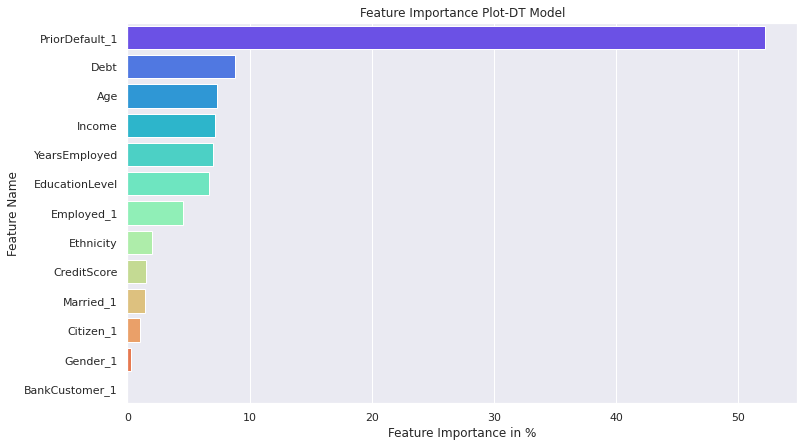

In [14]:


x=pd.DataFrame(dt_model.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot-DT Model')
plt.show()

In [15]:
# Variable Importance

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False)*100)

                      Imp
PriorDefault_1  52.212121
Debt             8.795153
Age              7.343155
Income           7.153312
YearsEmployed    7.003066
EducationLevel   6.661531
Employed_1       4.530713
Ethnicity        2.037149
CreditScore      1.497780
Married_1        1.424920
Citizen_1        1.061705
Gender_1         0.279396
BankCustomer_1   0.000000


In [16]:
perm = PermutationImportance(dt_model, scoring = 'accuracy' ,random_state=101).fit(X_test, y_test)
show_weights(perm, feature_names = list(X_test.columns))

Weight,Feature
0.1787 ± 0.0583,PriorDefault_1
0.0184 ± 0.0240,EducationLevel
0.0135 ± 0.0113,YearsEmployed
0.0106 ± 0.0455,Debt
0.0106 ± 0.0155,Employed_1
0.0077 ± 0.0099,CreditScore
0.0058 ± 0.0187,Age
0.0039 ± 0.0255,Income
0 ± 0.0000,BankCustomer_1
-0.0010 ± 0.0072,Married_1


Performing Predictions on Train and Test data with the DT Model

In [17]:
# Predicting Test Data
y_predict = dt_model.predict(X_test)

In [18]:
# Predicting train Data
y_predict_train = dt_model.predict(X_train)

Classification report on train data for DT Model

In [19]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve
from sklearn import metrics

1.0


classification on Train data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       265
           1       1.00      1.00      1.00       217

    accuracy                           1.00       482
   macro avg       1.00      1.00      1.00       482
weighted avg       1.00      1.00      1.00       482



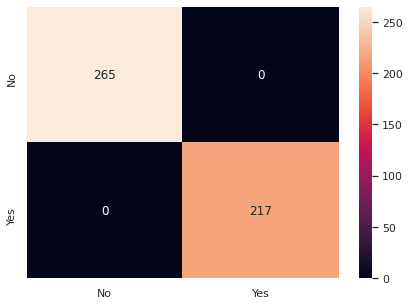

In [20]:
y_predict = dt_model.predict(X_train)

print(dt_model.score(X_train , y_train))

cm=metrics.confusion_matrix(y_train, y_predict,labels=[0, 1])


df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

print("\n")
print("classification on Train data:")
print(classification_report(y_train,y_predict_train))

0.7971014492753623


classification on Test data:
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       118
           1       0.74      0.81      0.77        89

    accuracy                           0.80       207
   macro avg       0.79      0.80      0.79       207
weighted avg       0.80      0.80      0.80       207



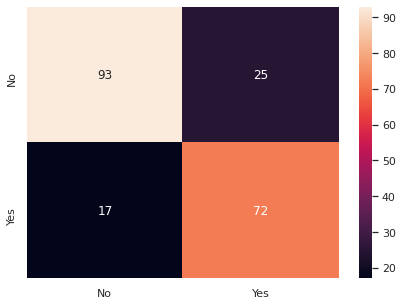

In [21]:

y_predict = dt_model.predict(X_test)

print(dt_model.score(X_test , y_test))


cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g');
print("\n")
print("classification on Test data:")
print(classification_report(y_test,y_predict))

AUC and ROC for the test data for DT Model

Area Under the Curve is 80.0 %


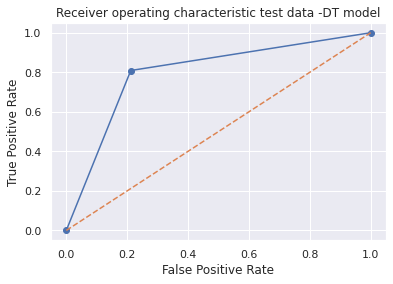

In [22]:
# Plot ROC_Curve

dt_fpr, dt_tpr,_=roc_curve(y_test,dt_model.predict_proba(X_test)[:,1])
plt.plot(dt_fpr,dt_tpr, marker='o', label='Decision Tree')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic test data -DT model')
print('Area Under the Curve is',round(roc_auc_score(y_test,dt_model.predict_proba(X_test)[:,1]),2)*100,'%')
plt.show()

AUC and ROC for the train data for DT Model

Area Under the Curve is 100.0 %


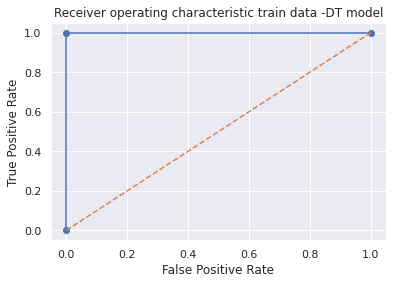

In [23]:
# Plot ROC_Curve

dt_fpr, dt_tpr,_=roc_curve(y_train,dt_model.predict_proba(X_train)[:,1])
plt.plot(dt_fpr,dt_tpr, marker='o', label='Decision Tree')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic train data -DT model')
print('Area Under the Curve is',round(roc_auc_score(y_train,dt_model.predict_proba(X_train)[:,1]),2)*100,'%')
plt.show()

Confusion Matrix for the training data-DT Model

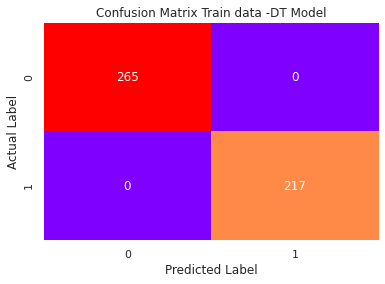

In [24]:
# Print Confusion Matrix

sns.heatmap(confusion_matrix(y_train,y_predict_train),annot=True, fmt='d', cbar=False,cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix Train data -DT Model')
plt.show()
plt.show()

Confusion Matrix for the test data-DT Model

## Ensemble Learning - Bagging

In [25]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve
import sklearn.metrics as metrics

In [26]:
bgcl = BaggingClassifier( n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train, y_train)

Classification report on Bagging Model -Train Set

1.0


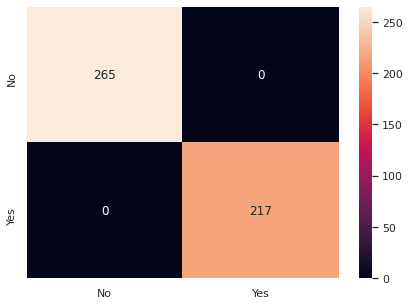

In [27]:
y_predict = bgcl.predict(X_train)

print(bgcl.score(X_train , y_train))

cm=metrics.confusion_matrix(y_train, y_predict,labels=[0, 1])


df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [28]:
print(metrics.classification_report(y_train, y_predict,digits=2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       265
           1       1.00      1.00      1.00       217

    accuracy                           1.00       482
   macro avg       1.00      1.00      1.00       482
weighted avg       1.00      1.00      1.00       482



Classification report on Bagging Model -Test Set

0.8260869565217391


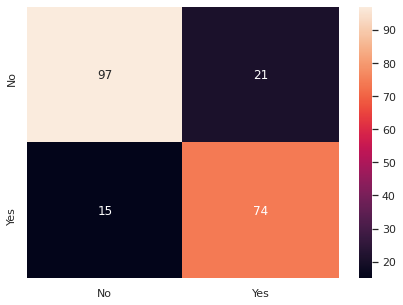

In [29]:

y_predict = bgcl.predict(X_test)

print(bgcl.score(X_test , y_test))


cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g');

In [30]:
print(metrics.classification_report(y_test, y_predict,digits=2))

              precision    recall  f1-score   support

           0       0.87      0.82      0.84       118
           1       0.78      0.83      0.80        89

    accuracy                           0.83       207
   macro avg       0.82      0.83      0.82       207
weighted avg       0.83      0.83      0.83       207



No handles with labels found to put in legend.


AUC: 1.000


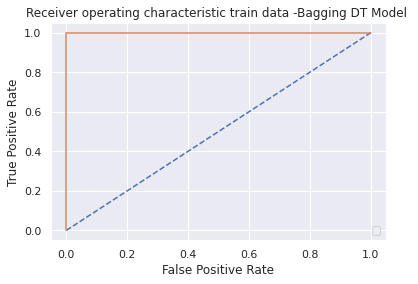

In [31]:
# predict probabilities
probs = bgcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % train_auc)
# calculate roc curve
train_fpr,train_tpr,train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic train data -Bagging DT Model ')
plt.legend(loc="lower right")
plt.savefig('Bagging DT _ROC')

No handles with labels found to put in legend.


AUC: 0.919


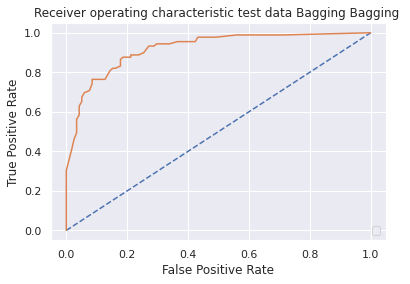

In [32]:
# predict probabilities
probs = bgcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr,test_tpr,test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic test data Bagging Bagging ')
plt.legend(loc="lower right")
plt.show()

Feature Importance

In [33]:
feature_importances = np.mean([
    tree.feature_importances_ for tree in bgcl.estimators_
], axis=0)

In [34]:

print (pd.DataFrame(feature_importances, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False)*100)

                      Imp
PriorDefault_1  51.559807
Debt            10.571671
Age              7.823608
Income           6.554161
YearsEmployed    5.991674
EducationLevel   4.739888
CreditScore      4.440022
Ethnicity        3.256843
Employed_1       1.752797
Gender_1         0.995904
Married_1        0.944534
Citizen_1        0.728468
BankCustomer_1   0.640621


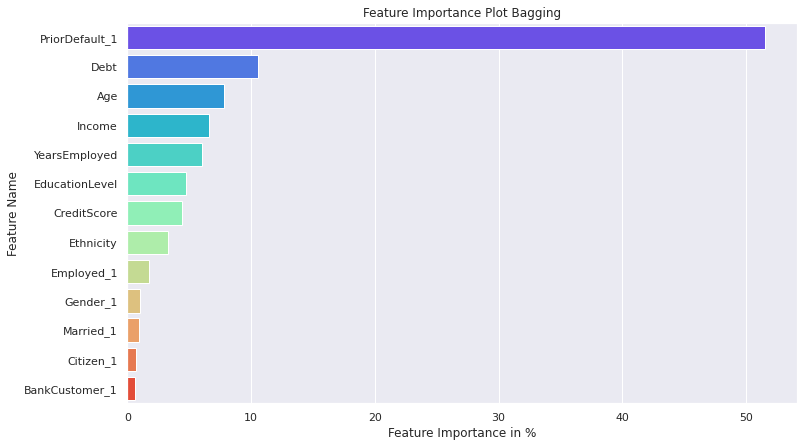

In [35]:
x=pd.DataFrame(feature_importances*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot Bagging')
plt.show()

In [36]:
perm = PermutationImportance(bgcl, scoring = 'accuracy' ,random_state=101).fit(X_test, y_test)
show_weights(perm, feature_names = list(X_test.columns))

Weight,Feature
0.2367 ± 0.0623,PriorDefault_1
0.0116 ± 0.0077,Debt
0.0106 ± 0.0166,YearsEmployed
0.0048 ± 0.0061,Married_1
0 ± 0.0000,Citizen_1
0.0000 ± 0.0061,BankCustomer_1
-0.0029 ± 0.0099,Employed_1
-0.0029 ± 0.0131,Gender_1
-0.0039 ± 0.0224,Income
-0.0039 ± 0.0166,Ethnicity


## Ensemble Learning - AdaBoosting 

In [37]:
abcl_D = AdaBoostClassifier(n_estimators=1000, random_state=1)
abcl_D = abcl_D.fit(X_train, y_train)

Classification report on Adaboosting Model -Train Set

0.991701244813278


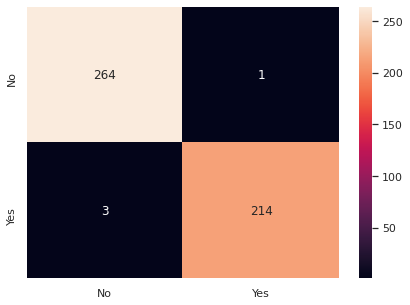

In [38]:
y_predict = abcl_D.predict(X_train)
print(abcl_D.score(X_train, y_train))

cm = metrics.confusion_matrix(y_train, y_predict, labels=[0,1])

df_cm = pd.DataFrame(cm, index=[i for i in ['No','Yes']],
                     columns  = [i for i in ['No', 'Yes']])

plt.figure(figsize=(7,5))

sns.heatmap(df_cm , annot=True,fmt = 'g')

In [39]:
print(metrics.classification_report(y_train, y_predict, digits=2))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       265
           1       1.00      0.99      0.99       217

    accuracy                           0.99       482
   macro avg       0.99      0.99      0.99       482
weighted avg       0.99      0.99      0.99       482



Classification report on Adaboosting Model -Test Set

0.7729468599033816


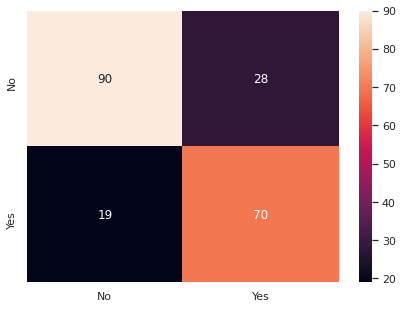

In [40]:
y_predict = abcl_D.predict(X_test)
print(abcl_D.score(X_test, y_test))

cm = metrics.confusion_matrix(y_test, y_predict, labels=[0,1])
df_cm = pd.DataFrame(cm, index=[i for i in ['No', 'Yes']],
                     columns = [i for i in ['No', 'Yes']])

plt.figure(figsize=(7,5))

sns.heatmap(df_cm, annot=True, fmt = 'g');

In [41]:
print(metrics.classification_report(y_test, y_predict, digits=2))

              precision    recall  f1-score   support

           0       0.83      0.76      0.79       118
           1       0.71      0.79      0.75        89

    accuracy                           0.77       207
   macro avg       0.77      0.77      0.77       207
weighted avg       0.78      0.77      0.77       207



ROC and AUC

No handles with labels found to put in legend.


AUC: 1.000


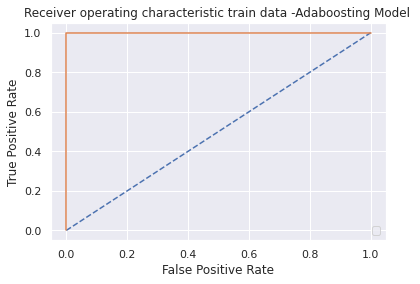

In [42]:
# predict probabilities
probs = bgcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % train_auc)
# calculate roc curve
train_fpr,train_tpr,train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic train data -Adaboosting Model ')
plt.legend(loc="lower right")


No handles with labels found to put in legend.


AUC: 0.919


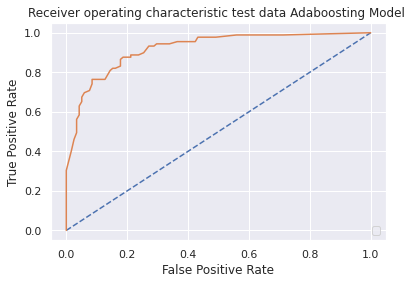

In [43]:
# predict probabilities
probs = bgcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr,test_tpr,test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic test data Adaboosting Model ')
plt.legend(loc="lower right")

plt.show()

Feature Importance

In [44]:
print (pd.DataFrame(abcl_D.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False)*100)

                 Imp
Age             36.2
Debt            21.5
YearsEmployed   17.8
Income          10.3
EducationLevel   7.5
PriorDefault_1   2.3
Ethnicity        1.9
CreditScore      1.2
Citizen_1        0.5
Gender_1         0.4
BankCustomer_1   0.3
Employed_1       0.1
Married_1        0.0


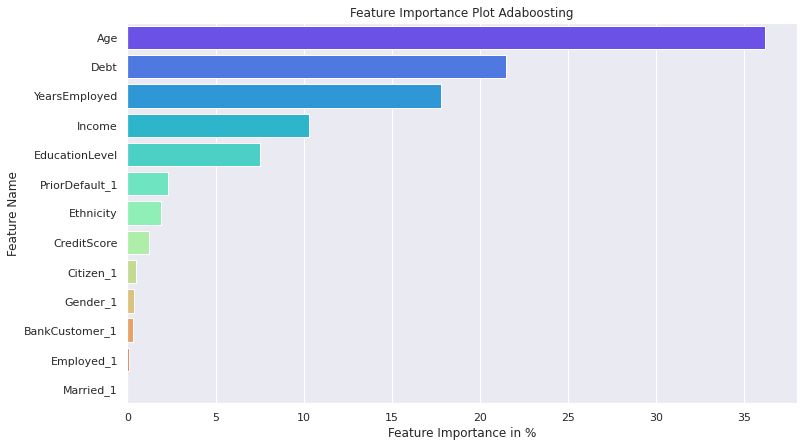

In [45]:
x=pd.DataFrame(abcl_D.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot Adaboosting')
plt.show()

In [46]:
perm = PermutationImportance(abcl_D, scoring = 'accuracy' ,random_state=101).fit(X_test, y_test)
show_weights(perm, feature_names = list(X_test.columns))

Weight,Feature
0.1614 ± 0.0607,PriorDefault_1
0.0261 ± 0.0225,CreditScore
0.0174 ± 0.0157,YearsEmployed
0.0087 ± 0.0215,Income
0.0058 ± 0.0072,Citizen_1
0.0058 ± 0.0197,Gender_1
0.0048 ± 0.0061,BankCustomer_1
0.0048 ± 0.0266,EducationLevel
0 ± 0.0000,Employed_1
0 ± 0.0000,Married_1


## Ensemble Learning - GradientBoost(GBM)

In [47]:
from sklearn.ensemble import GradientBoostingClassifier

In [48]:
gbcl = GradientBoostingClassifier(n_estimators=1000, random_state=1, max_depth=9)
gbcl = gbcl.fit(X_train, y_train)

1.0


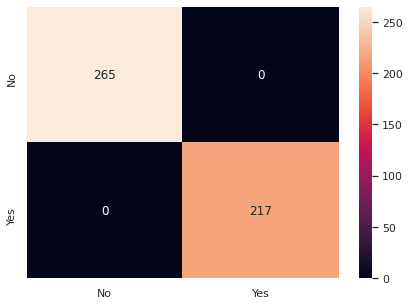

In [49]:
y_predict = gbcl.predict(X_train)
print(gbcl.score(X_train, y_train))

cm = metrics.confusion_matrix(y_train, y_predict, labels=[0,1])

df_cm = pd.DataFrame(cm, index=[i for i in ['No','Yes']],
                     columns = [i for i in ['No', 'Yes']])

plt.figure(figsize = (7,5))

sns.heatmap(df_cm, annot = True, fmt = 'g')

In [50]:
print(metrics.classification_report(y_train, y_predict, digits=2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       265
           1       1.00      1.00      1.00       217

    accuracy                           1.00       482
   macro avg       1.00      1.00      1.00       482
weighted avg       1.00      1.00      1.00       482



0.7922705314009661


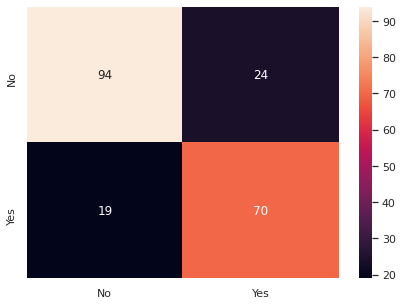

In [51]:
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [52]:
print(metrics.classification_report(y_test,y_predict, digits=2))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81       118
           1       0.74      0.79      0.77        89

    accuracy                           0.79       207
   macro avg       0.79      0.79      0.79       207
weighted avg       0.79      0.79      0.79       207



AUC And ROC

No handles with labels found to put in legend.


AUC: 1.000


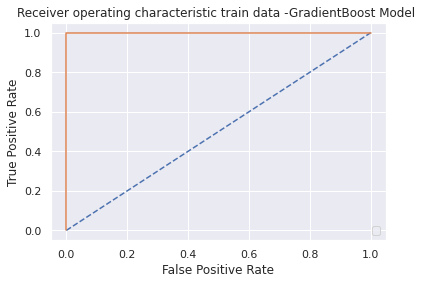

In [53]:
# predict probabilities
probs = gbcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % train_auc)
# calculate roc curve
train_fpr,train_tpr,train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic train data -GradientBoost Model ')
plt.legend(loc="lower right")


No handles with labels found to put in legend.


AUC: 0.902


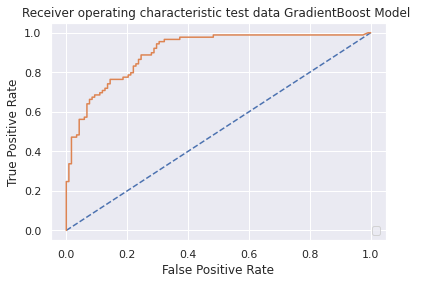

In [54]:
# predict probabilities
probs = gbcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr,test_tpr,test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic test data GradientBoost Model ')
plt.legend(loc="lower right")
plt.show()

In [55]:
feature_importances = np.mean([
    gbcl.feature_importances_ for tree in bgcl.estimators_
], axis=0)

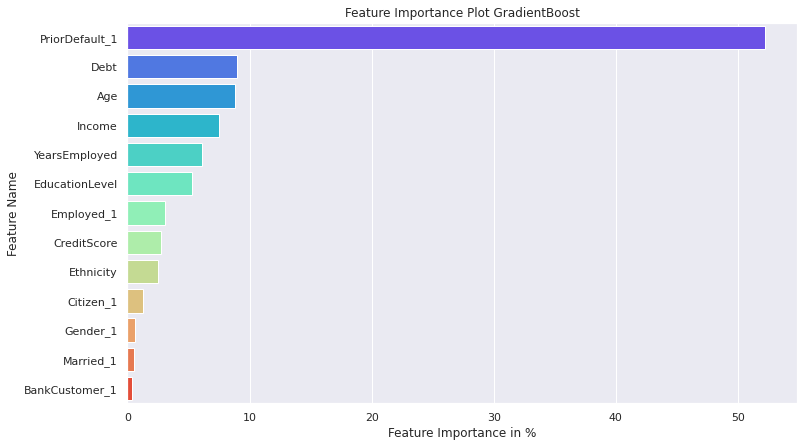

In [56]:
x=pd.DataFrame(feature_importances*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot GradientBoost')
plt.show()

In [57]:
#Permutation Importance
perm = PermutationImportance(gbcl, scoring = 'accuracy' ,random_state=101).fit(X_test, y_test)
show_weights(perm, feature_names = list(X_test.columns))

Weight,Feature
0.2058 ± 0.0730,PriorDefault_1
0.0271 ± 0.0284,YearsEmployed
0.0019 ± 0.0047,BankCustomer_1
0.0019 ± 0.0047,Married_1
-0.0010 ± 0.0187,CreditScore
-0.0029 ± 0.0047,Gender_1
-0.0048 ± 0.0203,Income
-0.0077 ± 0.0131,Age
-0.0097 ± 0.0086,Employed_1
-0.0106 ± 0.0128,Citizen_1


## LightGBM Model

In [58]:
from lightgbm import LGBMClassifier

In [59]:
lgbm = LGBMClassifier()
lgbm = lgbm.fit(X_train, y_train)

0.9979253112033195


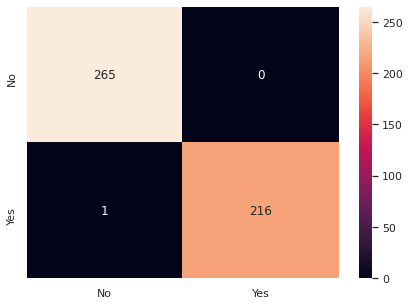

In [60]:
y_predict = lgbm.predict(X_train)
print(lgbm.score(X_train,y_train))

cm = metrics.confusion_matrix(y_train, y_predict, labels=[0,1])

df_cm = pd.DataFrame(cm, index= [i for i in ['No','Yes']],
                     columns = [i for i in ['No','Yes']])

plt.figure(figsize = (7,5))

sns.heatmap(df_cm, annot=True, fmt = 'g');

In [61]:
print(metrics,classification_report(y_train, y_predict, digits=2))

<module 'sklearn.metrics' from '/usr/local/lib/python3.7/dist-packages/sklearn/metrics/__init__.py'>               precision    recall  f1-score   support

           0       1.00      1.00      1.00       265
           1       1.00      1.00      1.00       217

    accuracy                           1.00       482
   macro avg       1.00      1.00      1.00       482
weighted avg       1.00      1.00      1.00       482



0.8357487922705314


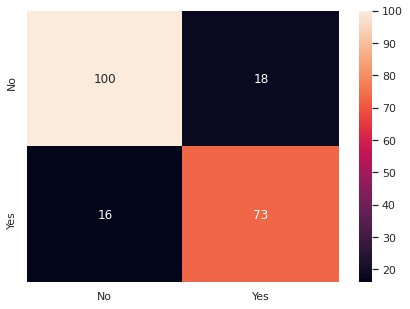

In [62]:
y_predict = lgbm .predict(X_test)
print(lgbm .score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [63]:
print(metrics.classification_report(y_test, y_predict,digits=2))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85       118
           1       0.80      0.82      0.81        89

    accuracy                           0.84       207
   macro avg       0.83      0.83      0.83       207
weighted avg       0.84      0.84      0.84       207



AUC and ROC

No handles with labels found to put in legend.


AUC: 1.000


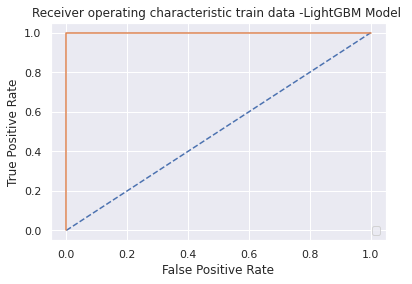

In [64]:
# predict probabilities
probs = lgbm.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % train_auc)
# calculate roc curve
train_fpr,train_tpr,train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic train data -LightGBM Model ')
plt.legend(loc="lower right")

No handles with labels found to put in legend.


AUC: 0.907


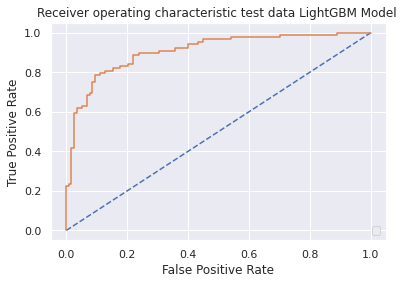

In [65]:
# predict probabilities
probs = lgbm.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr,test_tpr,test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic test data LightGBM Model ')
plt.legend(loc="lower right")
plt.show()

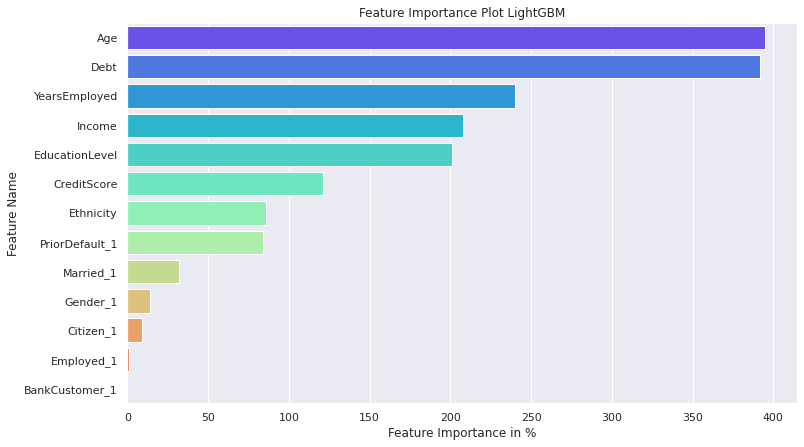

In [66]:
x=pd.DataFrame(lgbm.feature_importances_,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot LightGBM')
plt.show()

In [67]:
pd.DataFrame(lgbm.feature_importances_,index=X_train.columns).sort_values(by=0,ascending=False)

,0
Age,395
Debt,392
YearsEmployed,240
Income,208
EducationLevel,201
CreditScore,121
Ethnicity,86
PriorDefault_1,84
Married_1,32
Gender_1,14


In [68]:
#Permutation Importance
perm = PermutationImportance(lgbm, scoring = 'accuracy' ,random_state=101).fit(X_test, y_test,)
show_weights(perm, feature_names = list(X_test.columns))

Weight,Feature
0.2425 ± 0.0749,PriorDefault_1
0.0174 ± 0.0099,Debt
0.0164 ± 0.0116,YearsEmployed
0.0145 ± 0.0203,Income
0.0039 ± 0.0095,Married_1
0.0019 ± 0.0099,Ethnicity
0.0019 ± 0.0047,Gender_1
0.0000 ± 0.0061,CreditScore
0 ± 0.0000,Employed_1
0 ± 0.0000,BankCustomer_1


## CatBoost Ensemble Model

In [69]:
pip install catboost

In [70]:
from catboost import CatBoostClassifier

In [71]:
catboost = CatBoostClassifier()
catboost = catboost.fit(X_train, y_train)

Learning rate set to 0.007544
0:	learn: 0.6861586	total: 49.8ms	remaining: 49.8s
1:	learn: 0.6799538	total: 51.1ms	remaining: 25.5s
2:	learn: 0.6737302	total: 52.4ms	remaining: 17.4s
3:	learn: 0.6675266	total: 53.8ms	remaining: 13.4s
4:	learn: 0.6610587	total: 55ms	remaining: 11s
5:	learn: 0.6548680	total: 56.3ms	remaining: 9.33s
6:	learn: 0.6485698	total: 57.6ms	remaining: 8.17s
7:	learn: 0.6428344	total: 58.9ms	remaining: 7.3s
8:	learn: 0.6362088	total: 60.2ms	remaining: 6.63s
9:	learn: 0.6302817	total: 61.5ms	remaining: 6.09s
10:	learn: 0.6250189	total: 62.1ms	remaining: 5.58s
11:	learn: 0.6193471	total: 63.4ms	remaining: 5.22s
12:	learn: 0.6139019	total: 64.7ms	remaining: 4.91s
13:	learn: 0.6085821	total: 66ms	remaining: 4.64s
14:	learn: 0.6033789	total: 67.3ms	remaining: 4.42s
15:	learn: 0.5976152	total: 68.9ms	remaining: 4.24s
16:	learn: 0.5928368	total: 70.2ms	remaining: 4.06s
17:	learn: 0.5873472	total: 71.5ms	remaining: 3.9s
18:	learn: 0.5817777	total: 72.8ms	remaining: 3.76s


0.979253112033195


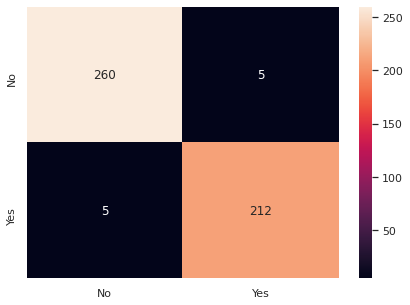

In [72]:
y_predict = catboost.predict(X_train)
print(catboost.score(X_train, y_train))
cm=metrics.confusion_matrix(y_train, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [73]:
print(metrics.classification_report(y_train, y_predict,digits=2))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       265
           1       0.98      0.98      0.98       217

    accuracy                           0.98       482
   macro avg       0.98      0.98      0.98       482
weighted avg       0.98      0.98      0.98       482



0.8502415458937198


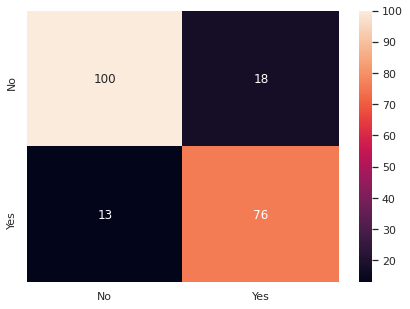

In [74]:
y_predict = catboost.predict(X_test)
print(catboost.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [75]:
print(metrics.classification_report(y_test, y_predict,digits=2))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87       118
           1       0.81      0.85      0.83        89

    accuracy                           0.85       207
   macro avg       0.85      0.85      0.85       207
weighted avg       0.85      0.85      0.85       207



AUC and ROC

No handles with labels found to put in legend.


AUC: 0.997


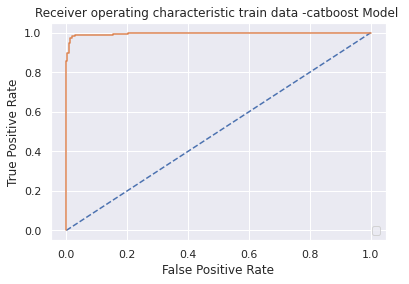

In [76]:
# predict probabilities
probs = catboost.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % train_auc)
# calculate roc curve
train_fpr,train_tpr,train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic train data -catboost Model ')
plt.legend(loc="lower right")


No handles with labels found to put in legend.


AUC: 0.928


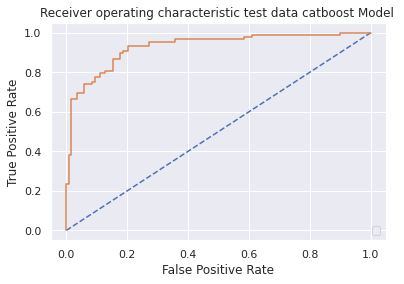

In [77]:
# predict probabilities
probs = catboost.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr,test_tpr,test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic test data catboost Model ')
plt.legend(loc="lower right")
plt.show()

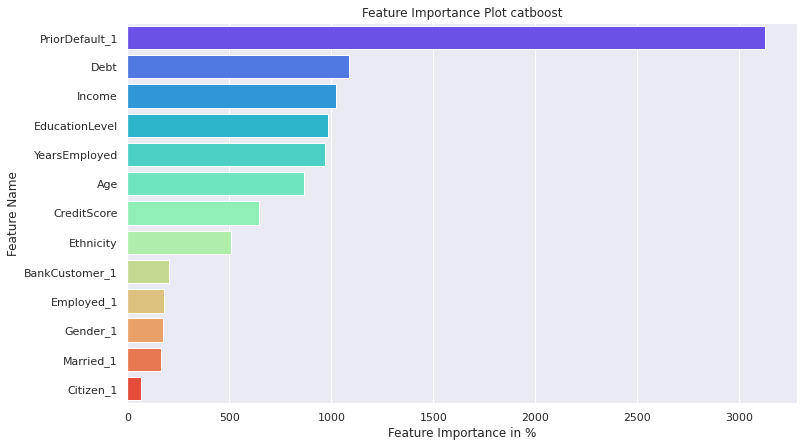

In [78]:
x=pd.DataFrame(catboost.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot catboost')
plt.show()

In [79]:
#Permutation Importance
perm = PermutationImportance(catboost, scoring = 'accuracy' ,random_state=101).fit(X_test, y_test,)
show_weights(perm, feature_names = list(X_test.columns))

Weight,Feature
0.2444 ± 0.0812,PriorDefault_1
0.0203 ± 0.0095,Debt
0.0135 ± 0.0039,Citizen_1
0.0126 ± 0.0131,YearsEmployed
0.0058 ± 0.0072,BankCustomer_1
0.0048 ± 0.0061,Gender_1
0.0039 ± 0.0072,Married_1
0.0039 ± 0.0197,Income
0.0029 ± 0.0099,Ethnicity
0.0019 ± 0.0131,CreditScore


## Extreme Gradient Boosting Machine (XG-BOOST)

In [80]:
import xgboost as xgb

In [81]:
clfXGB=xgb.XGBClassifier()
clfXGB.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

0.9522821576763485


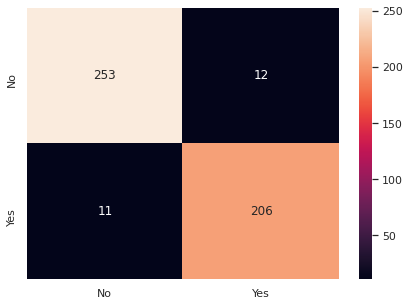

In [82]:
y_predict = clfXGB.predict(X_train)
print(clfXGB.score(X_train, y_train))
cm=metrics.confusion_matrix(y_train, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [83]:
y_pred=clfXGB.predict(X_train)
model_scoreXGB=clfXGB.score(X_train,y_train)
print(model_scoreXGB)
print(metrics.confusion_matrix(y_train,y_pred))
print(metrics.classification_report(y_train, y_pred))

0.9522821576763485
[[253  12]
 [ 11 206]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       265
           1       0.94      0.95      0.95       217

    accuracy                           0.95       482
   macro avg       0.95      0.95      0.95       482
weighted avg       0.95      0.95      0.95       482



0.8502415458937198


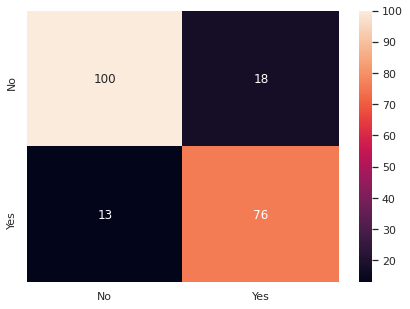

In [84]:
y_predict = clfXGB.predict(X_test)
print(clfXGB.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [85]:
#clfXGB=xgb.XGBClassifier(n_estimators=1000,learning_rate=0.01, max_depth=9 )
#clfXGB.fit(X_train, y_train)
y_pred=clfXGB.predict(X_test)
model_scoreXGB=clfXGB.score(X_test,y_test)
print(model_scoreXGB)
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.classification_report(y_test, y_pred))

0.8502415458937198
[[100  18]
 [ 13  76]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.87       118
           1       0.81      0.85      0.83        89

    accuracy                           0.85       207
   macro avg       0.85      0.85      0.85       207
weighted avg       0.85      0.85      0.85       207



No handles with labels found to put in legend.


AUC: 0.991


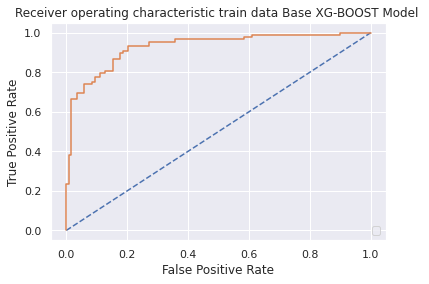

In [86]:
# predict probabilities
probs = clfXGB.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % train_auc)
# calculate roc curve
train_fpr,train_tpr,train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic train data Base XG-BOOST Model ')
plt.legend(loc="lower right")
plt.show()

No handles with labels found to put in legend.


AUC: 0.922


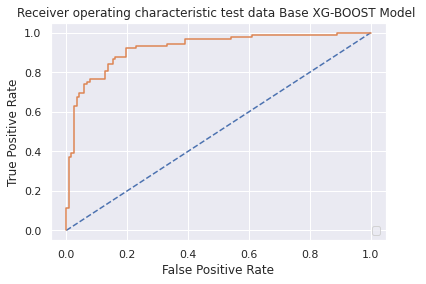

In [87]:
# predict probabilities
probs = clfXGB.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr,test_tpr,test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic test data Base XG-BOOST Model ')
plt.legend(loc="lower right")
plt.show()

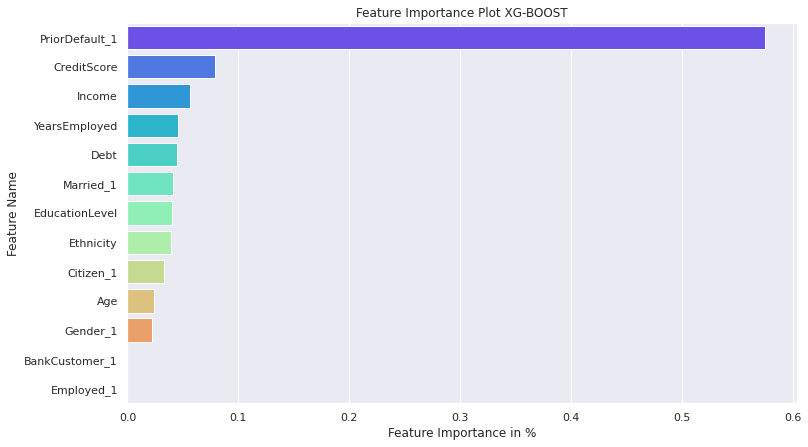

In [88]:
x=pd.DataFrame(clfXGB.feature_importances_,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot XG-BOOST')
plt.show()

## Gaussian Naive Bayes

In [89]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [90]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [91]:
# Performance Matrix on train data set

y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)                      ## Accuracy
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))          ## confusion_matrix
print(metrics.classification_report(y_train, y_train_predict))  

0.8464730290456431
[[240  25]
 [ 49 168]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       265
           1       0.87      0.77      0.82       217

    accuracy                           0.85       482
   macro avg       0.85      0.84      0.84       482
weighted avg       0.85      0.85      0.85       482



In [92]:
## Performance Matrix on test data set
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)                    ## Accuracy
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))         ## confusion_matrix
print(metrics.classification_report(y_test, y_test_predict))  

0.8405797101449275
[[101  17]
 [ 16  73]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       118
           1       0.81      0.82      0.82        89

    accuracy                           0.84       207
   macro avg       0.84      0.84      0.84       207
weighted avg       0.84      0.84      0.84       207



AUC and ROC

No handles with labels found to put in legend.


AUC: 0.908


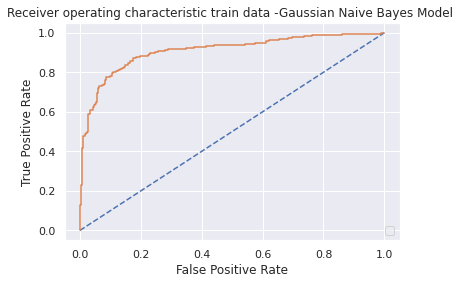

In [93]:
# predict probabilities
probs = NB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % train_auc)
# calculate roc curve
train_fpr,train_tpr,train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic train data -Gaussian Naive Bayes Model ')
plt.legend(loc="lower right")


No handles with labels found to put in legend.


AUC: 0.909


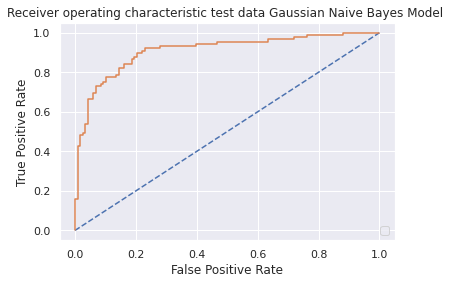

In [94]:
# predict probabilities
probs =  NB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr,test_tpr,test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic test data Gaussian Naive Bayes Model ')
plt.legend(loc="lower right")
plt.show()

In [95]:
#Permutation Importance
perm = PermutationImportance(NB_model, scoring = 'accuracy' ,random_state=1).fit(X_test, y_test,)
show_weights(perm, feature_names = list(X_test.columns))

Weight,Feature
0.1188 ± 0.0413,PriorDefault_1
0.0541 ± 0.0232,CreditScore
0.0271 ± 0.0157,Income
0.0145 ± 0.0335,Employed_1
0.0058 ± 0.0113,BankCustomer_1
0.0048 ± 0.0150,Debt
0.0039 ± 0.0425,YearsEmployed
0.0029 ± 0.0047,Gender_1
0.0019 ± 0.0116,Married_1
-0.0000 ± 0.0061,Ethnicity


## KNN _Model

Generally, good KNN performance usually requires preprocessing of data to make all variables similarly scaled and centered

Now lets apply zscore on continues columns and see the performance for KNN


In [96]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler

In [97]:
sc = StandardScaler()

In [98]:
X_train = sc.fit_transform(X_train)

In [99]:
X_test = sc.transform(X_test)

In [100]:
KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [101]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8651452282157677
[[242  23]
 [ 42 175]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       265
           1       0.88      0.81      0.84       217

    accuracy                           0.87       482
   macro avg       0.87      0.86      0.86       482
weighted avg       0.87      0.87      0.86       482



In [102]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8792270531400966
[[106  12]
 [ 13  76]]
              precision    recall  f1-score   support

           0       0.89      0.90      0.89       118
           1       0.86      0.85      0.86        89

    accuracy                           0.88       207
   macro avg       0.88      0.88      0.88       207
weighted avg       0.88      0.88      0.88       207



In [103]:
# Default value n_neighbors=5, lets check the performance for K=7

In [104]:
KNN_model=KNeighborsClassifier(n_neighbors=7)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [105]:
# Run the KNN with no of neighbours to be 1,3,5..19 and *Find the optimal number of neighbours from K=1,3,5,7....19 using the Mis classification error
# 
# Hint: Misclassification error (MCE) = 1 - Test accuracy score. Calculated MCE for each model with neighbours = 1,3,5...19 and find the model with lowest MCE

In [106]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # evaluate test accuracy
    scores = knn.score(X_test, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.16425120772946855,
 0.13526570048309183,
 0.12077294685990336,
 0.14009661835748788,
 0.14009661835748788,
 0.14492753623188404,
 0.1594202898550725,
 0.1594202898550725,
 0.16425120772946855,
 0.1690821256038647]

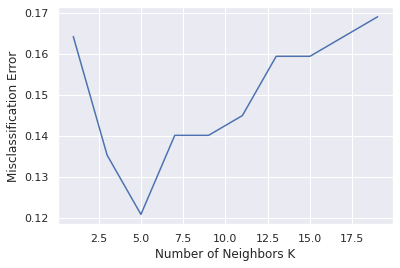

In [107]:
# Plot misclassification error vs k (with k value on X-axis) using matplotli

import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [108]:
KNN_model=KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [109]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8651452282157677
[[242  23]
 [ 42 175]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       265
           1       0.88      0.81      0.84       217

    accuracy                           0.87       482
   macro avg       0.87      0.86      0.86       482
weighted avg       0.87      0.87      0.86       482



In [110]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8792270531400966
[[106  12]
 [ 13  76]]
              precision    recall  f1-score   support

           0       0.89      0.90      0.89       118
           1       0.86      0.85      0.86        89

    accuracy                           0.88       207
   macro avg       0.88      0.88      0.88       207
weighted avg       0.88      0.88      0.88       207



AUC and ROC

No handles with labels found to put in legend.


AUC: 0.954


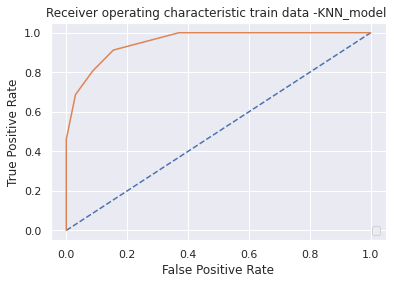

In [111]:
# predict probabilities
probs = KNN_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % train_auc)
# calculate roc curve
train_fpr,train_tpr,train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic train data -KNN_model ')
plt.legend(loc="lower right")

No handles with labels found to put in legend.


AUC: 0.925


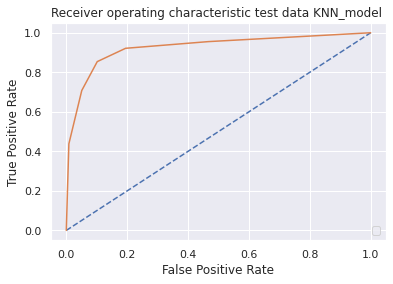

In [112]:
# predict probabilities
probs = KNN_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr,test_tpr,test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic test data KNN_model ')
plt.legend(loc="lower right")
plt.show()

## ANN Model

In [113]:
from sklearn.neural_network import MLPClassifier

In [114]:
sc = StandardScaler()

In [115]:
X_train = sc.fit_transform(X_train)

In [116]:
X_test = sc.transform(X_test)

In [117]:
clf = MLPClassifier(hidden_layer_sizes=100, max_iter=5000,
                     solver='sgd', verbose=True,  random_state=21,tol=0.01)

In [118]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

Iteration 1, loss = 0.62107594
Iteration 2, loss = 0.61837992
Iteration 3, loss = 0.61411698
Iteration 4, loss = 0.60896369
Iteration 5, loss = 0.60306502
Iteration 6, loss = 0.59686268
Iteration 7, loss = 0.59051638
Iteration 8, loss = 0.58402415
Iteration 9, loss = 0.57760070
Iteration 10, loss = 0.57142765
Iteration 11, loss = 0.56531160
Iteration 12, loss = 0.55928159
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.


In [119]:
pred2 = clf.predict(X_train)
confusion_matrix(y_train,pred2)

array([[203,  62],
       [ 39, 178]])

In [120]:
print(classification_report(y_train, pred2))

              precision    recall  f1-score   support

           0       0.84      0.77      0.80       265
           1       0.74      0.82      0.78       217

    accuracy                           0.79       482
   macro avg       0.79      0.79      0.79       482
weighted avg       0.80      0.79      0.79       482



In [121]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[79, 39],
       [22, 67]])

In [122]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.67      0.72       118
           1       0.63      0.75      0.69        89

    accuracy                           0.71       207
   macro avg       0.71      0.71      0.70       207
weighted avg       0.72      0.71      0.71       207



AUC and ROC

AUC: 0.855


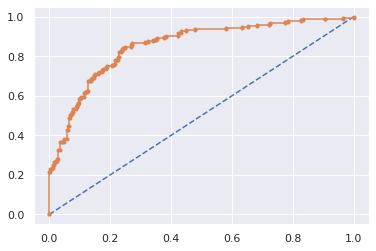

In [123]:
# AUC and ROC for the training data

# predict probabilities
probs = clf.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.822


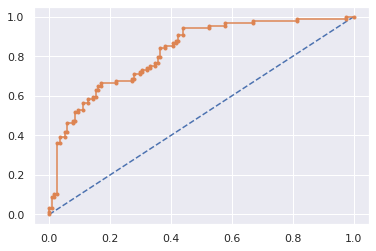

In [124]:
# AUC and ROC for the test data

# predict probabilities
probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

## Random Forest

In [125]:
rf = RandomForestClassifier()

In [126]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

1.0


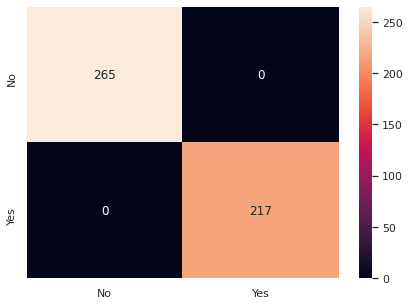

In [127]:
y_predict = rf.predict(X_train)
print(rf.score(X_train, y_train))
cm=metrics.confusion_matrix(y_train, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [128]:
y_pred=rf.predict(X_train)
model_scoreXGB=rf.score(X_train,y_train)
print(model_scoreXGB)
print(metrics.confusion_matrix(y_train,y_pred))
print(metrics.classification_report(y_train, y_pred))

1.0
[[265   0]
 [  0 217]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       265
           1       1.00      1.00      1.00       217

    accuracy                           1.00       482
   macro avg       1.00      1.00      1.00       482
weighted avg       1.00      1.00      1.00       482



0.855072463768116


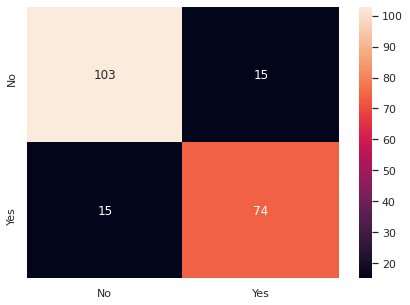

In [129]:
y_predict = rf.predict(X_test)
print(rf.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [130]:
y_pred=rf.predict(X_test)
model_scoreXGB=rf.score(X_test,y_test)
print(model_scoreXGB)
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.classification_report(y_test, y_pred))

0.855072463768116
[[103  15]
 [ 15  74]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       118
           1       0.83      0.83      0.83        89

    accuracy                           0.86       207
   macro avg       0.85      0.85      0.85       207
weighted avg       0.86      0.86      0.86       207



AUC: 1.000


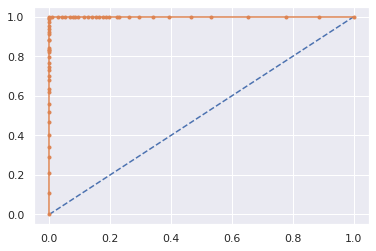

In [131]:
# AUC and ROC for the training data

# predict probabilities
probs = rf.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.933


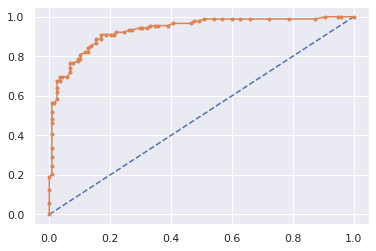

In [132]:
# AUC and ROC for the test data

# predict probabilities
probs = rf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

## Hyper Tune Models 

## Extreme Gradient Boosting Machine (XG-Boost)-After Hyperparameter Tuning

In [133]:
# example of grid searching key hyperparameters for BaggingClassifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from matplotlib import pyplot

In [134]:
# grid search
model = XGBClassifier()
n_estimators = range(50, 1000, 50)
param_grid = dict(n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, y_train)

In [135]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.321307 using {'n_estimators': 50}
-0.321307 (0.040582) with: {'n_estimators': 50}
-0.342128 (0.046250) with: {'n_estimators': 100}
-0.366052 (0.053463) with: {'n_estimators': 150}
-0.390884 (0.060254) with: {'n_estimators': 200}
-0.410408 (0.064910) with: {'n_estimators': 250}
-0.428273 (0.068210) with: {'n_estimators': 300}
-0.444934 (0.071410) with: {'n_estimators': 350}
-0.464521 (0.076252) with: {'n_estimators': 400}
-0.480296 (0.079437) with: {'n_estimators': 450}
-0.494651 (0.083744) with: {'n_estimators': 500}
-0.510056 (0.087421) with: {'n_estimators': 550}
-0.523901 (0.090489) with: {'n_estimators': 600}
-0.535349 (0.093162) with: {'n_estimators': 650}
-0.543371 (0.094279) with: {'n_estimators': 700}
-0.550857 (0.095609) with: {'n_estimators': 750}
-0.558565 (0.096810) with: {'n_estimators': 800}
-0.564893 (0.098711) with: {'n_estimators': 850}
-0.571318 (0.101042) with: {'n_estimators': 900}
-0.578202 (0.102755) with: {'n_estimators': 950}


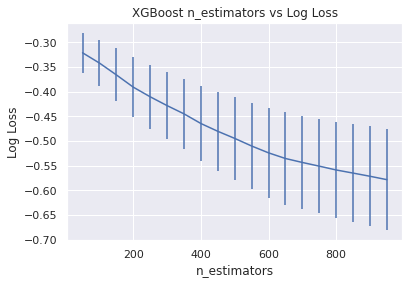

In [136]:
# plot
pyplot.errorbar(n_estimators, means, yerr=stds)
pyplot.title("XGBoost n_estimators vs Log Loss")
pyplot.xlabel('n_estimators')
pyplot.ylabel('Log Loss')
pyplot.savefig('n_estimators.png')

In [137]:
# n_estimater is 650 as there is not much logloss after this. 

XGBoost on dataset, Tune max_depth


In [138]:
# grid search
model = XGBClassifier()
max_depth = range(1, 17, 2)
print(max_depth)
param_grid = dict(max_depth=max_depth)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train, y_train)

range(1, 17, 2)
Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    4.2s finished


In [139]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.318931 using {'max_depth': 1}
-0.318931 (0.043700) with: {'max_depth': 1}
-0.342128 (0.046250) with: {'max_depth': 3}
-0.384760 (0.084922) with: {'max_depth': 5}
-0.407630 (0.092696) with: {'max_depth': 7}
-0.401151 (0.090193) with: {'max_depth': 9}
-0.403110 (0.085100) with: {'max_depth': 11}
-0.403110 (0.085100) with: {'max_depth': 13}
-0.403110 (0.085100) with: {'max_depth': 15}


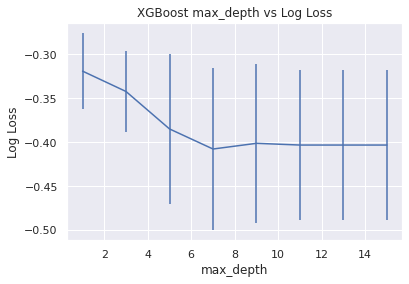

In [140]:
# plot
pyplot.errorbar(max_depth, means, yerr=stds)
pyplot.title("XGBoost max_depth vs Log Loss")
pyplot.xlabel('max_depth')
pyplot.ylabel('Log Loss')
pyplot.savefig('max_depth.png')

In [141]:
# Max Depth is 8 and 9

Finding number of trees

In [142]:
# grid search
model = XGBClassifier()
n_estimators = [50,100,150,200,250,300,350,400,450,500]
max_depth = [ 2, 3, 4,4,6,7,8]
print(max_depth)
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train, y_train)

[2, 3, 4, 4, 6, 7, 8]
Fitting 10 folds for each of 70 candidates, totalling 700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 428 tasks      | elapsed:   35.2s
[Parallel(n_jobs=-1)]: Done 700 out of 700 | elapsed:  1.2min finished


In [143]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.317517 using {'max_depth': 2, 'n_estimators': 50}
-0.317517 (0.041261) with: {'max_depth': 2, 'n_estimators': 50}
-0.318570 (0.047570) with: {'max_depth': 2, 'n_estimators': 100}
-0.328452 (0.047525) with: {'max_depth': 2, 'n_estimators': 150}
-0.344104 (0.047011) with: {'max_depth': 2, 'n_estimators': 200}
-0.358511 (0.047312) with: {'max_depth': 2, 'n_estimators': 250}
-0.371960 (0.047992) with: {'max_depth': 2, 'n_estimators': 300}
-0.383684 (0.050110) with: {'max_depth': 2, 'n_estimators': 350}
-0.396677 (0.051042) with: {'max_depth': 2, 'n_estimators': 400}
-0.408462 (0.055389) with: {'max_depth': 2, 'n_estimators': 450}
-0.421677 (0.059876) with: {'max_depth': 2, 'n_estimators': 500}
-0.321307 (0.040582) with: {'max_depth': 3, 'n_estimators': 50}
-0.342128 (0.046250) with: {'max_depth': 3, 'n_estimators': 100}
-0.366052 (0.053463) with: {'max_depth': 3, 'n_estimators': 150}
-0.390884 (0.060254) with: {'max_depth': 3, 'n_estimators': 200}
-0.410408 (0.064910) with: {'max_

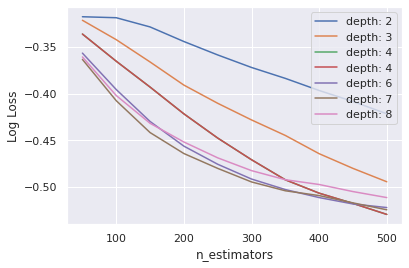

In [144]:
import numpy as np

# plot results
scores = np.array(means).reshape(len(max_depth), len(n_estimators))
for i, value in enumerate(max_depth):
    pyplot.plot(n_estimators, scores[i], label='depth: ' + str(value))
pyplot.legend()
pyplot.xlabel('n_estimators')
pyplot.ylabel('Log Loss')
pyplot.savefig('n_estimators_vs_max_depth.png')

In [145]:
# grid search
model = XGBClassifier()
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,0.4,0.5,0.6]
print(max_depth)
param_grid = dict(learning_rate=learning_rate)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train, y_train)

[2, 3, 4, 4, 6, 7, 8]
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  87 out of  90 | elapsed:    3.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    3.1s finished


In [146]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.342128 using {'learning_rate': 0.1}
-0.687489 (0.000470) with: {'learning_rate': 0.0001}
-0.641106 (0.004264) with: {'learning_rate': 0.001}
-0.415825 (0.023798) with: {'learning_rate': 0.01}
-0.342128 (0.046250) with: {'learning_rate': 0.1}
-0.399804 (0.065278) with: {'learning_rate': 0.2}
-0.432028 (0.081032) with: {'learning_rate': 0.3}
-0.483722 (0.084552) with: {'learning_rate': 0.4}
-0.525275 (0.081313) with: {'learning_rate': 0.5}
-0.560587 (0.122919) with: {'learning_rate': 0.6}


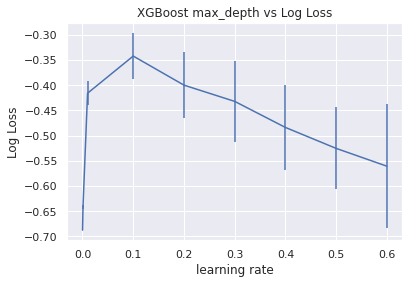

In [147]:
# plot
pyplot.errorbar(learning_rate, means, yerr=stds)
pyplot.title("XGBoost max_depth vs Log Loss")
pyplot.xlabel('learning rate')
pyplot.ylabel('Log Loss')
pyplot.savefig('max_depth.png')

In [148]:
# grid search
model = XGBClassifier()
base_score = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]
print(base_score)
param_grid = dict(base_score=base_score)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train, y_train)

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    2.7s finished


In [149]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.340371 using {'base_score': 0.4}
-0.341198 (0.052905) with: {'base_score': 0.1}
-0.341145 (0.053883) with: {'base_score': 0.2}
-0.341076 (0.046697) with: {'base_score': 0.3}
-0.340371 (0.046975) with: {'base_score': 0.4}
-0.342128 (0.046250) with: {'base_score': 0.5}
-0.341156 (0.048036) with: {'base_score': 0.6}
-0.343849 (0.045005) with: {'base_score': 0.7}
-0.341624 (0.048197) with: {'base_score': 0.8}


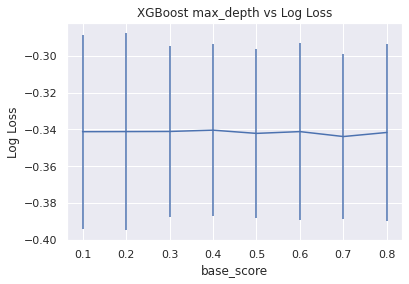

In [150]:
# plot
pyplot.errorbar(base_score, means, yerr=stds)
pyplot.title("XGBoost max_depth vs Log Loss")
pyplot.xlabel('base_score')
pyplot.ylabel('Log Loss')
pyplot.savefig('base_score.png')

Hyperparameter Tuned XGBoost model

In [151]:
clfXGB=xgb.XGBClassifier(n_estimators=650,learning_rate=0.8, max_depth=8, gamma=5, base_score=0.55)

In [152]:
clfXGB.fit(X_train, y_train)

XGBClassifier(base_score=0.55, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=5,
              learning_rate=0.8, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=650, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [153]:
clfXGB=xgb.XGBClassifier(n_estimators=650,learning_rate=0.8, max_depth=8, gamma=5, base_score=0.55)
clfXGB.fit(X_train, y_train)
y_pred_train=clfXGB.predict(X_train)
model_scoreXGB=clfXGB.score(X_train,y_train)
print(model_scoreXGB)
print(metrics.confusion_matrix(y_train,y_pred_train))
print(metrics.classification_report(y_train, y_pred_train))

0.8983402489626556
[[240  25]
 [ 24 193]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       265
           1       0.89      0.89      0.89       217

    accuracy                           0.90       482
   macro avg       0.90      0.90      0.90       482
weighted avg       0.90      0.90      0.90       482



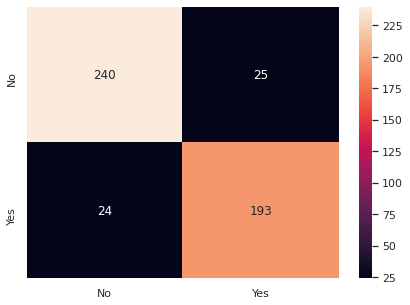

In [154]:
cm=metrics.confusion_matrix(y_train, y_pred_train,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [155]:
y_pred=clfXGB.predict(X_test)
model_scoreXGB=clfXGB.score(X_test,y_test)
print(model_scoreXGB)
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.classification_report(y_test, y_pred))

0.8502415458937198
[[99 19]
 [12 77]]
              precision    recall  f1-score   support

           0       0.89      0.84      0.86       118
           1       0.80      0.87      0.83        89

    accuracy                           0.85       207
   macro avg       0.85      0.85      0.85       207
weighted avg       0.85      0.85      0.85       207



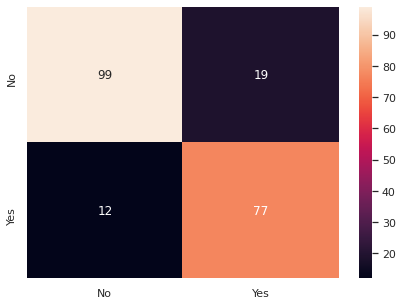

In [156]:
cm=metrics.confusion_matrix(y_test, y_pred,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

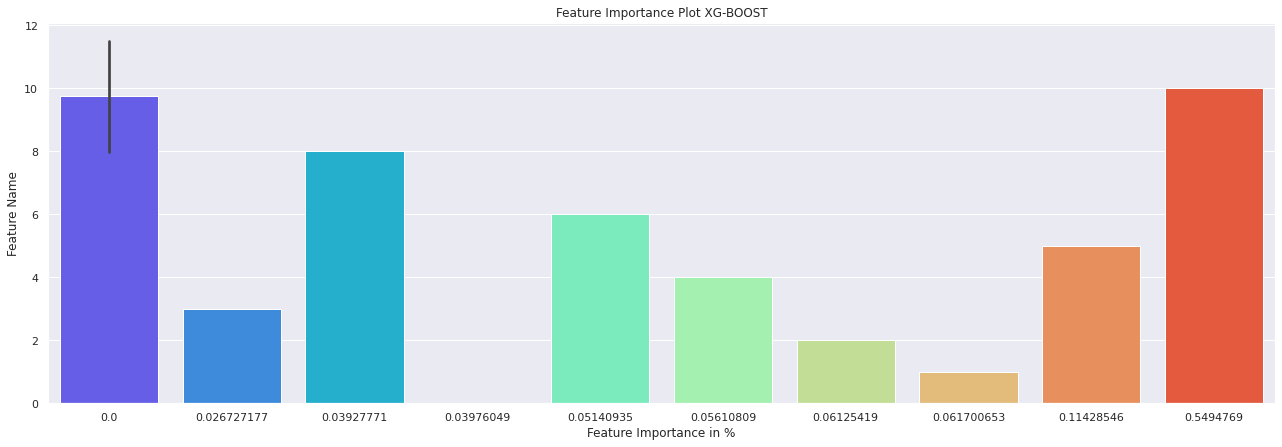

In [157]:
x=pd.DataFrame(clfXGB.feature_importances_).sort_values(by=0,ascending=False)
plt.figure(figsize=(22,7))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot XG-BOOST')
plt.show()

No handles with labels found to put in legend.


AUC: 0.963


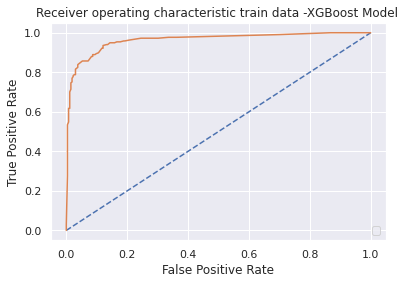

In [158]:
# predict probabilities
probs = clfXGB.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % train_auc)
# calculate roc curve
train_fpr,train_tpr,train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic train data -XGBoost Model ')
plt.legend(loc="lower right")
plt.savefig('XGBoost _ROC')

No handles with labels found to put in legend.


AUC: 0.915


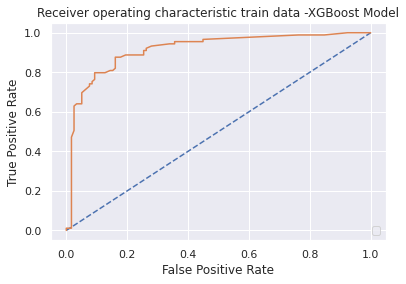

In [159]:
# predict probabilities
probs = clfXGB.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % train_auc)
# calculate roc curve
train_fpr,train_tpr,train_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic train data -XGBoost Model')
plt.legend(loc="lower right")
plt.savefig('XGBoost _ROC')

In [160]:

model = xgb.XGBClassifier(n_estimators=650,learning_rate=0.8, max_depth=8, gamma=5, base_score=0.55) # XGBClassifier()
model.fit(X_train, y_train)
pd.DataFrame({'Variable':X.columns,
              'Importance':model.feature_importances_*100}).sort_values('Importance', ascending=False)

,Variable,Importance
10,PriorDefault_1,54.947693
5,CreditScore,11.428546
1,Debt,6.170065
2,EducationLevel,6.125419
4,YearsEmployed,5.610809
6,Income,5.140935
0,Age,3.976049
8,Married_1,3.927771
3,Ethnicity,2.672718
7,Gender_1,0.000000


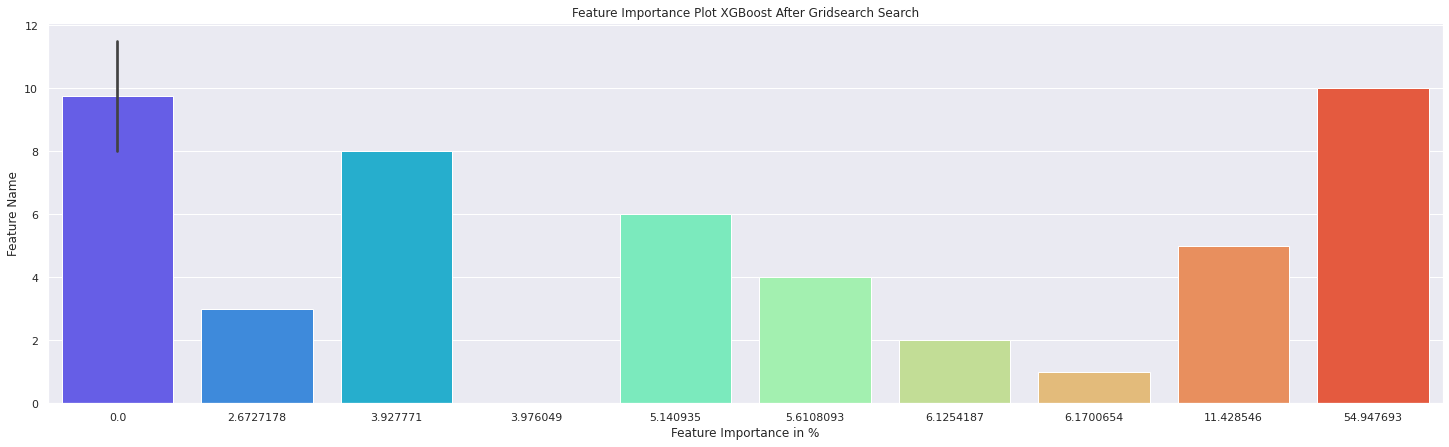

In [161]:
x=pd.DataFrame(model.feature_importances_*100,).sort_values(by=0,ascending=False)
plt.figure(figsize=(25,7))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot XGBoost After Gridsearch Search')
plt.show()

In [162]:
perm = PermutationImportance(model, scoring = 'accuracy' ,random_state=101).fit(X_test, y_test)
show_weights(perm, feature_names = list(X.columns))

Weight,Feature
0.2705 ± 0.0650,PriorDefault_1
0.0164 ± 0.0233,Debt
0.0116 ± 0.0077,CreditScore
0.0106 ± 0.0187,Married_1
0.0097 ± 0.0137,YearsEmployed
0.0029 ± 0.0168,Income
0.0029 ± 0.0131,Age
0 ± 0.0000,Citizen_1
0 ± 0.0000,Employed_1
0 ± 0.0000,BankCustomer_1


## KNN Tuned

In [163]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler

In [164]:
sc = StandardScaler()

In [165]:
X_train = sc.fit_transform(X_train)

In [166]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # evaluate test accuracy
    scores = knn.score(X_test, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.16425120772946855,
 0.13526570048309183,
 0.12077294685990336,
 0.14009661835748788,
 0.14009661835748788,
 0.14492753623188404,
 0.1594202898550725,
 0.1594202898550725,
 0.16425120772946855,
 0.1690821256038647]

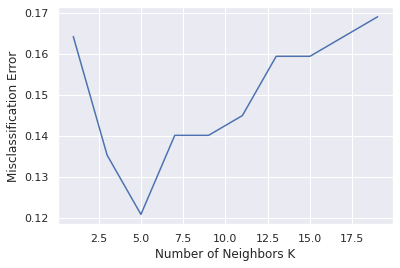

In [167]:
# Plot misclassification error vs k (with k value on X-axis) using matplotli

import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [168]:
KNN_model=KNeighborsClassifier(n_neighbors=5,p = 3)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=3,
                     weights='uniform')

In [169]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8713692946058091
[[243  22]
 [ 40 177]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       265
           1       0.89      0.82      0.85       217

    accuracy                           0.87       482
   macro avg       0.87      0.87      0.87       482
weighted avg       0.87      0.87      0.87       482



In [170]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8599033816425121
[[104  14]
 [ 15  74]]
              precision    recall  f1-score   support

           0       0.87      0.88      0.88       118
           1       0.84      0.83      0.84        89

    accuracy                           0.86       207
   macro avg       0.86      0.86      0.86       207
weighted avg       0.86      0.86      0.86       207



AUC and ROC

No handles with labels found to put in legend.


AUC: 0.953


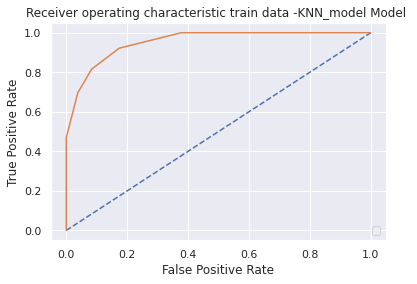

In [171]:
# predict probabilities
probs = KNN_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % train_auc)
# calculate roc curve
train_fpr,train_tpr,train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic train data -KNN_model Model ')
plt.legend(loc="lower right")

No handles with labels found to put in legend.


AUC: 0.926


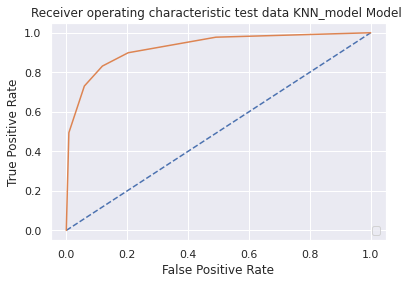

In [172]:
# predict probabilities
probs = KNN_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr,test_tpr,test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic test data KNN_model Model ')
plt.legend(loc="lower right")
plt.show()

With Smote

In [173]:
from imblearn.over_sampling import SMOTE
# SMOTE is only applied on the train data set

In [174]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

In [175]:
## Let's check the shape after SMOTE
X_train_res.shape

(530, 13)

In [176]:
# KNN With SMOTE¶
from sklearn.neighbors import KNeighborsClassifier

In [177]:
KNN_SM_model=KNeighborsClassifier(n_neighbors=5, weights='distance')
KNN_SM_model.fit(X_train_res,y_train_res)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [178]:
## Performance Matrix on train data set
y_train_predict = KNN_SM_model.predict(X_train_res)
model_score = KNN_SM_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res, y_train_predict))

1.0
[[265   0]
 [  0 265]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       265
           1       1.00      1.00      1.00       265

    accuracy                           1.00       530
   macro avg       1.00      1.00      1.00       530
weighted avg       1.00      1.00      1.00       530



In [179]:
## Performance Matrix on test data set
y_test_predict = KNN_SM_model.predict(X_test)
model_score = KNN_SM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8840579710144928
[[106  12]
 [ 12  77]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       118
           1       0.87      0.87      0.87        89

    accuracy                           0.88       207
   macro avg       0.88      0.88      0.88       207
weighted avg       0.88      0.88      0.88       207



AUC and ROC

No handles with labels found to put in legend.


AUC: 1.000


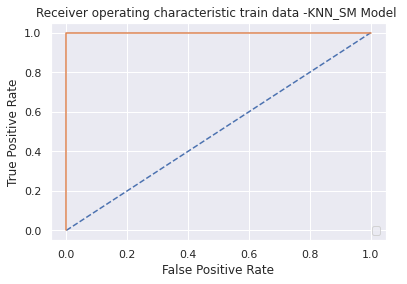

In [180]:
# predict probabilities
probs = KNN_SM_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % train_auc)
# calculate roc curve
train_fpr,train_tpr,train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic train data -KNN_SM Model ')
plt.legend(loc="lower right")

No handles with labels found to put in legend.


AUC: 0.173


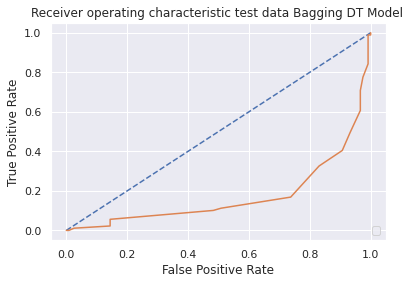

In [181]:
# predict probabilities
probs = bgcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr,test_tpr,test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic test data Bagging DT Model ')
plt.legend(loc="lower right")
plt.show()

## LightGBM Model

In [182]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot

n_estimators

In [183]:
# grid search
model = LGBMClassifier()
n_estimators = range(10, 300, 20)
param_grid = dict(n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, y_train)

In [184]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.337806 using {'n_estimators': 30}
-0.399242 (0.027643) with: {'n_estimators': 10}
-0.337806 (0.056344) with: {'n_estimators': 30}
-0.356692 (0.067556) with: {'n_estimators': 50}
-0.387493 (0.076300) with: {'n_estimators': 70}
-0.426727 (0.090377) with: {'n_estimators': 90}
-0.470766 (0.106297) with: {'n_estimators': 110}
-0.512961 (0.124258) with: {'n_estimators': 130}
-0.557250 (0.143452) with: {'n_estimators': 150}
-0.596771 (0.150636) with: {'n_estimators': 170}
-0.637454 (0.165415) with: {'n_estimators': 190}
-0.677800 (0.175118) with: {'n_estimators': 210}
-0.726148 (0.187208) with: {'n_estimators': 230}
-0.772116 (0.201677) with: {'n_estimators': 250}
-0.817472 (0.218537) with: {'n_estimators': 270}
-0.863513 (0.228602) with: {'n_estimators': 290}


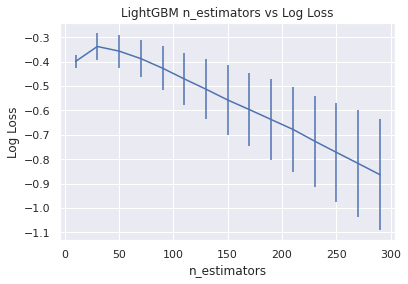

In [185]:
# plot
pyplot.errorbar(n_estimators, means, yerr=stds)
pyplot.title("LightGBM n_estimators vs Log Loss")
pyplot.xlabel('n_estimators')
pyplot.ylabel('Log Loss')
pyplot.savefig('n_estimators.png')

max_depth

In [186]:
# grid search
max_depth = range(1, 17, 2)
print(max_depth)
param_grid = dict(max_depth=max_depth)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train, y_train)

range(1, 17, 2)
Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    2.2s finished


In [187]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.316818 using {'max_depth': 1}
-0.316818 (0.046250) with: {'max_depth': 1}
-0.346990 (0.057966) with: {'max_depth': 3}
-0.399775 (0.079020) with: {'max_depth': 5}
-0.428106 (0.098018) with: {'max_depth': 7}
-0.449431 (0.103289) with: {'max_depth': 9}
-0.446308 (0.097643) with: {'max_depth': 11}
-0.450274 (0.097861) with: {'max_depth': 13}
-0.450274 (0.097861) with: {'max_depth': 15}


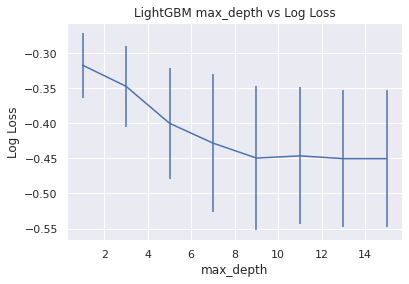

In [188]:
# plot
pyplot.errorbar(max_depth, means, yerr=stds)
pyplot.title("LightGBM max_depth vs Log Loss")
pyplot.xlabel('max_depth')
pyplot.ylabel('Log Loss')
pyplot.savefig('max_depth.png')

Learing rate

In [189]:
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,0.4,0.5,0.6]
print(max_depth)
param_grid = dict(learning_rate=learning_rate)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train, y_train)

range(1, 17, 2)
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    2.7s finished


In [190]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.399997 using {'learning_rate': 0.01}
-0.682236 (0.001664) with: {'learning_rate': 0.0001}
-0.633474 (0.004907) with: {'learning_rate': 0.001}
-0.399997 (0.027474) with: {'learning_rate': 0.01}
-0.450274 (0.097861) with: {'learning_rate': 0.1}
-0.678547 (0.168366) with: {'learning_rate': 0.2}
-0.880087 (0.220278) with: {'learning_rate': 0.3}
-1.162992 (0.331219) with: {'learning_rate': 0.4}
-1.330609 (0.367102) with: {'learning_rate': 0.5}
-1.427214 (0.361743) with: {'learning_rate': 0.6}


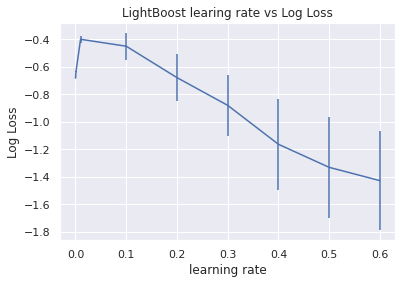

In [191]:
# plot
pyplot.errorbar(learning_rate, means, yerr=stds)
pyplot.title("LightBoost learing rate vs Log Loss")
pyplot.xlabel('learning rate')
pyplot.ylabel('Log Loss')
pyplot.savefig('max_depth.png')

reg_alpha

In [192]:
reg_alpha = [0.01, 0.1, 0.2, 0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
print(max_depth)
param_grid = dict(reg_alpha=reg_alpha)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train, y_train)

range(1, 17, 2)
Fitting 10 folds for each of 11 candidates, totalling 110 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:    3.0s finished


In [193]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.361126 using {'reg_alpha': 1}
-0.442379 (0.093773) with: {'reg_alpha': 0.01}
-0.416304 (0.087692) with: {'reg_alpha': 0.1}
-0.403576 (0.076767) with: {'reg_alpha': 0.2}
-0.395004 (0.068407) with: {'reg_alpha': 0.3}
-0.386845 (0.066747) with: {'reg_alpha': 0.4}
-0.383710 (0.062266) with: {'reg_alpha': 0.5}
-0.381784 (0.067736) with: {'reg_alpha': 0.6}
-0.373337 (0.064003) with: {'reg_alpha': 0.7}
-0.370328 (0.063767) with: {'reg_alpha': 0.8}
-0.368434 (0.063074) with: {'reg_alpha': 0.9}
-0.361126 (0.058586) with: {'reg_alpha': 1}


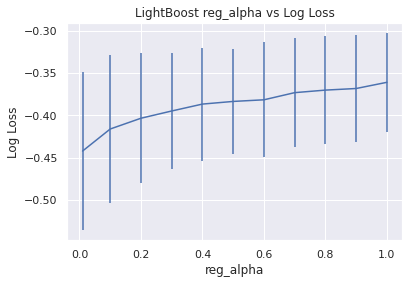

In [194]:
# plot
pyplot.errorbar(reg_alpha, means, yerr=stds)
pyplot.title("LightBoost reg_alpha vs Log Loss")
pyplot.xlabel('reg_alpha')
pyplot.ylabel('Log Loss')
pyplot.savefig('max_depth.png')

reg_lambda

In [195]:
reg_lambda = [0.01,0.2,0.5,0.6,0.7,0.9,1,1.5,2,2.5,3,3.5,4,4.5,5]
print(max_depth)
param_grid = dict(reg_lambda=reg_lambda)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train, y_train)

range(1, 17, 2)
Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    4.0s finished


In [196]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.340929 using {'reg_lambda': 5}
-0.434302 (0.094388) with: {'reg_lambda': 0.01}
-0.413100 (0.083051) with: {'reg_lambda': 0.2}
-0.393224 (0.071623) with: {'reg_lambda': 0.5}
-0.397772 (0.074733) with: {'reg_lambda': 0.6}
-0.392250 (0.074794) with: {'reg_lambda': 0.7}
-0.380604 (0.066049) with: {'reg_lambda': 0.9}
-0.383520 (0.070832) with: {'reg_lambda': 1}
-0.367427 (0.068575) with: {'reg_lambda': 1.5}
-0.358725 (0.061206) with: {'reg_lambda': 2}
-0.356603 (0.059963) with: {'reg_lambda': 2.5}
-0.350082 (0.061662) with: {'reg_lambda': 3}
-0.348556 (0.057748) with: {'reg_lambda': 3.5}
-0.345906 (0.055871) with: {'reg_lambda': 4}
-0.344739 (0.054937) with: {'reg_lambda': 4.5}
-0.340929 (0.053559) with: {'reg_lambda': 5}


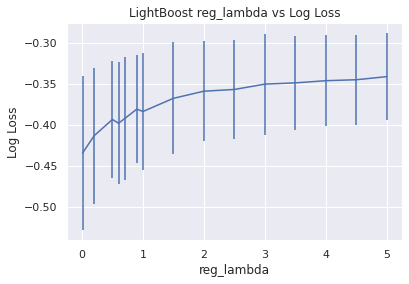

In [197]:
# plot
pyplot.errorbar(reg_lambda, means, yerr=stds)
pyplot.title("LightBoost reg_lambda vs Log Loss")
pyplot.xlabel('reg_lambda')
pyplot.ylabel('Log Loss')
pyplot.savefig('max_depth.png')

Param imputation

In [198]:
from lightgbm import LGBMClassifier

In [199]:
lgbm = LGBMClassifier(max_depth=8, reg_alpha=0.5, reg_lambda=3, learning_rate=0.05, n_estimators=50, class_weight='balanced')

In [200]:
lgbm = lgbm.fit(X_train, y_train)


In [201]:
y_predict_test = lgbm.predict(X_test)
print(metrics.classification_report(y_test, y_predict_test,digits=2))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86       118
           1       0.79      0.89      0.84        89

    accuracy                           0.85       207
   macro avg       0.85      0.85      0.85       207
weighted avg       0.86      0.85      0.85       207



In [202]:
y_predict = lgbm.predict(X_train)
print(metrics.classification_report(y_train, y_predict, digits=2))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89       265
           1       0.86      0.89      0.88       217

    accuracy                           0.89       482
   macro avg       0.88      0.89      0.89       482
weighted avg       0.89      0.89      0.89       482



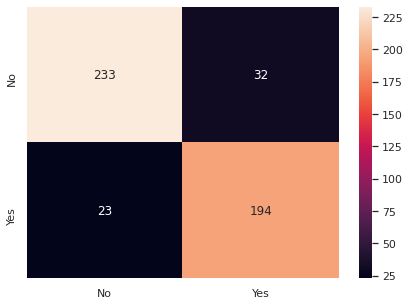

In [203]:

cm=metrics.confusion_matrix(y_train, y_predict,labels=[0, 1])


df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

AUC and ROC

No handles with labels found to put in legend.


AUC: 0.963


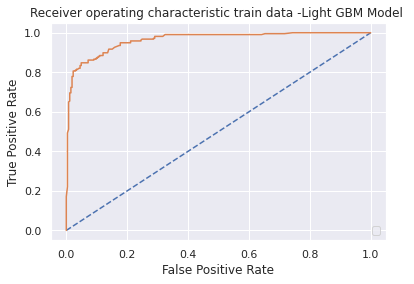

In [204]:
# predict probabilities
probs = lgbm.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % train_auc)
# calculate roc curve
train_fpr,train_tpr,train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic train data -Light GBM Model ')
plt.legend(loc="lower right")

AUC: 0.931


No handles with labels found to put in legend.


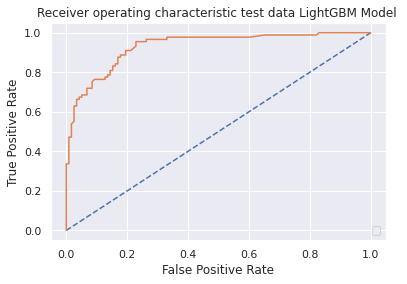

In [205]:
# predict probabilities
probs = lgbm.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr,test_tpr,test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic test data LightGBM Model ')
plt.legend(loc="lower right")
plt.show()

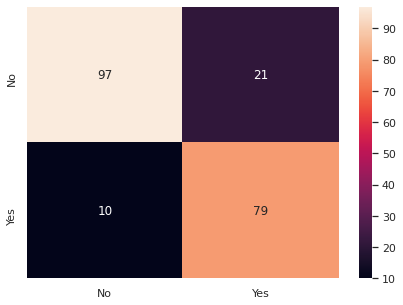

In [206]:

cm=metrics.confusion_matrix(y_test, y_predict_test,labels=[0, 1])


df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [207]:

feature_importance =pd.DataFrame({'Variable':X.columns,
              'Importance':lgbm.feature_importances_}).sort_values('Importance', ascending=False)

feature_importance

,Variable,Importance
1,Debt,83
4,YearsEmployed,60
2,EducationLevel,50
10,PriorDefault_1,50
6,Income,46
5,CreditScore,37
0,Age,33
8,Married_1,11
3,Ethnicity,6
11,Employed_1,1


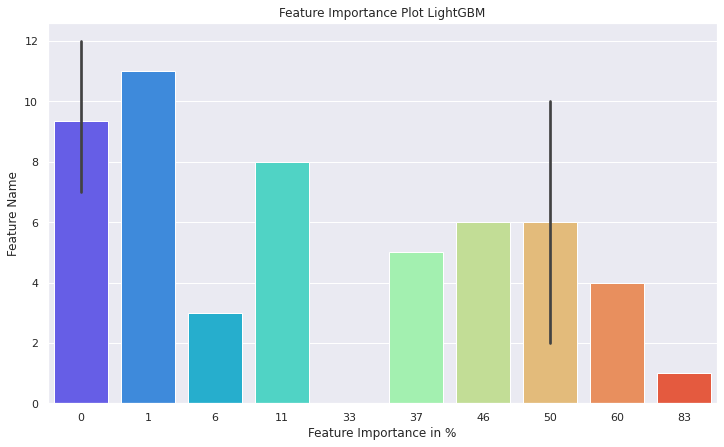

In [208]:
x=pd.DataFrame(lgbm.feature_importances_).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot LightGBM')
plt.show()

## Ensemble Learning - Bagging

In [222]:
bgcl_light = BaggingClassifier( n_estimators=50,random_state=1,base_estimator=LGBMClassifier(max_depth=8, reg_alpha=0.5, reg_lambda=3, learning_rate=0.025, n_estimators=50, class_weight='balanced') )

bgcl_light = bgcl_light.fit(X_train, y_train)

0.8755186721991701


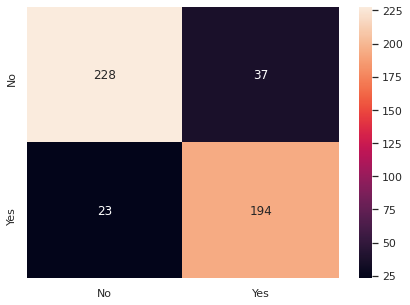

In [223]:
y_predict = bgcl_light.predict(X_train)

print(bgcl_light.score(X_train , y_train))

cm=metrics.confusion_matrix(y_train, y_predict,labels=[0, 1])


df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [224]:
print(metrics.classification_report(y_train, y_predict,digits=2))

              precision    recall  f1-score   support

           0       0.91      0.86      0.88       265
           1       0.84      0.89      0.87       217

    accuracy                           0.88       482
   macro avg       0.87      0.88      0.87       482
weighted avg       0.88      0.88      0.88       482



0.8502415458937198


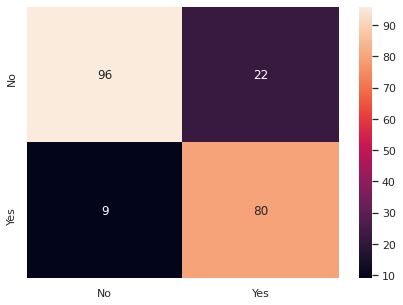

In [225]:

y_predict = bgcl_light.predict(X_test)

print(bgcl_light.score(X_test , y_test))


cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g');

In [226]:
print(metrics.classification_report(y_test, y_predict,digits=2))

              precision    recall  f1-score   support

           0       0.91      0.81      0.86       118
           1       0.78      0.90      0.84        89

    accuracy                           0.85       207
   macro avg       0.85      0.86      0.85       207
weighted avg       0.86      0.85      0.85       207



AUC and ROC

No handles with labels found to put in legend.


AUC: 0.957


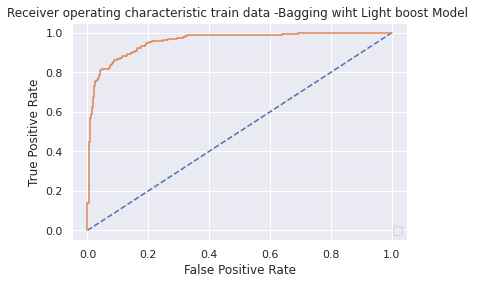

In [227]:
# predict probabilities
probs = bgcl_light.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % train_auc)
# calculate roc curve
train_fpr,train_tpr,train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic train data -Bagging wiht Light boost Model ')
plt.legend(loc="lower right")

Feature Importance

In [228]:
feature_importances = np.mean([
    tree.feature_importances_ for tree in bgcl_light.estimators_
], axis=0)

In [229]:
print (pd.DataFrame(feature_importances, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False)*100)

                   Imp
Debt            8318.0
PriorDefault_1  5000.0
YearsEmployed   4772.0
CreditScore     4322.0
Income          3888.0
EducationLevel  3264.0
Age             3060.0
Married_1       1252.0
Ethnicity        444.0
Citizen_1         68.0
Gender_1          24.0
Employed_1        18.0
BankCustomer_1     0.0


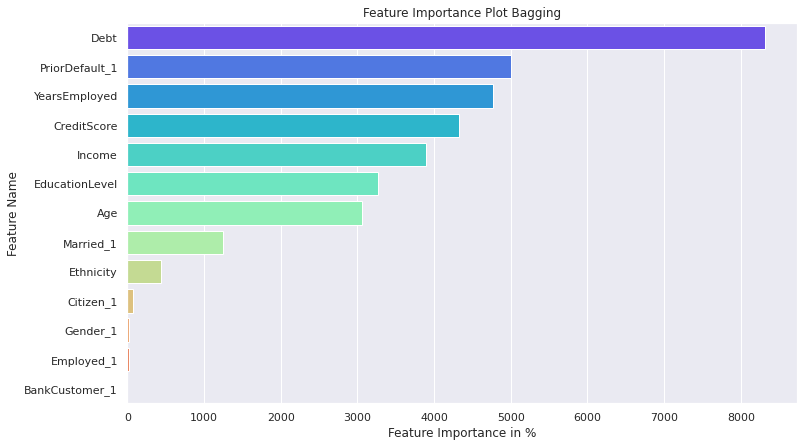

In [230]:
x=pd.DataFrame(feature_importances*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot Bagging')
plt.show()

## Random Tune Forest

In [231]:
# grid search
model = RandomForestClassifier()
n_estimators = range(50, 800, 50)
param_grid = dict(n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, y_train)

In [232]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.355685 using {'n_estimators': 600}
-0.475752 (0.267012) with: {'n_estimators': 50}
-0.427503 (0.148524) with: {'n_estimators': 100}
-0.542393 (0.263948) with: {'n_estimators': 150}
-0.425046 (0.141825) with: {'n_estimators': 200}
-0.420396 (0.142376) with: {'n_estimators': 250}
-0.363261 (0.037181) with: {'n_estimators': 300}
-0.360101 (0.041671) with: {'n_estimators': 350}
-0.355885 (0.035288) with: {'n_estimators': 400}
-0.357943 (0.037594) with: {'n_estimators': 450}
-0.419688 (0.141693) with: {'n_estimators': 500}
-0.360171 (0.040791) with: {'n_estimators': 550}
-0.355685 (0.037347) with: {'n_estimators': 600}
-0.358630 (0.036732) with: {'n_estimators': 650}
-0.358427 (0.037259) with: {'n_estimators': 700}
-0.361917 (0.037903) with: {'n_estimators': 750}


Text(0, 0.5, 'Log Loss')

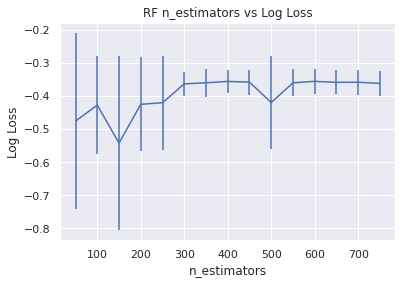

In [233]:
# plot
pyplot.errorbar(n_estimators, means, yerr=stds)
pyplot.title("RF n_estimators vs Log Loss")
pyplot.xlabel('n_estimators')
pyplot.ylabel('Log Loss')


n_estimater at 400

In [234]:
# Minimum sample leaf
model = RandomForestClassifier(n_estimators=400)
min_samples_leaf = range(1, 50, 5)
param_grid = dict(min_samples_leaf=min_samples_leaf)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, y_train)

In [235]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.357904 using {'min_samples_leaf': 6}
-0.362915 (0.040699) with: {'min_samples_leaf': 1}
-0.357904 (0.036033) with: {'min_samples_leaf': 6}
-0.371978 (0.032065) with: {'min_samples_leaf': 11}
-0.382400 (0.032145) with: {'min_samples_leaf': 16}
-0.396403 (0.030238) with: {'min_samples_leaf': 21}
-0.410379 (0.032778) with: {'min_samples_leaf': 26}
-0.419325 (0.033315) with: {'min_samples_leaf': 31}
-0.429161 (0.030803) with: {'min_samples_leaf': 36}
-0.434542 (0.028509) with: {'min_samples_leaf': 41}
-0.439605 (0.025108) with: {'min_samples_leaf': 46}


Text(0, 0.5, 'Log Loss')

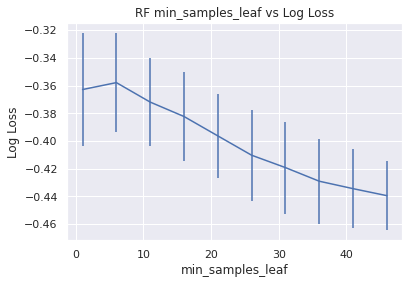

In [236]:
# plot
pyplot.errorbar(min_samples_leaf, means, yerr=stds)
pyplot.title("RF min_samples_leaf vs Log Loss")
pyplot.xlabel('min_samples_leaf')
pyplot.ylabel('Log Loss')

min_sample_leaf = 6

In [237]:
# max_depth
model = RandomForestClassifier(n_estimators=400, min_samples_leaf=6)
max_depth = range(2, 20, 2)
param_grid = dict(max_depth=max_depth)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, y_train)

In [238]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.357234 using {'max_depth': 16}
-0.420659 (0.029609) with: {'max_depth': 2}
-0.368491 (0.035569) with: {'max_depth': 4}
-0.361534 (0.034793) with: {'max_depth': 6}
-0.358646 (0.035027) with: {'max_depth': 8}
-0.360237 (0.036605) with: {'max_depth': 10}
-0.358572 (0.037036) with: {'max_depth': 12}
-0.361161 (0.037380) with: {'max_depth': 14}
-0.357234 (0.036549) with: {'max_depth': 16}
-0.360391 (0.035884) with: {'max_depth': 18}


Text(0, 0.5, 'Log Loss')

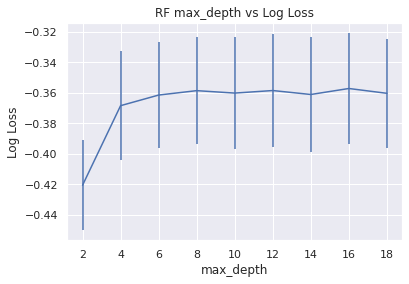

In [239]:
# plot
pyplot.errorbar(max_depth, means, yerr=stds)
pyplot.title("RF max_depth vs Log Loss")
pyplot.xlabel('max_depth')
pyplot.ylabel('Log Loss')

max_depth = 6

In [240]:
# min_samples_split
model = RandomForestClassifier(n_estimators=400, min_samples_leaf=6, max_depth=6)
min_samples_split = range(2, 20, 2)
param_grid = dict(min_samples_split=min_samples_split)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, y_train)

In [241]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.357304 using {'min_samples_split': 10}
-0.362581 (0.034964) with: {'min_samples_split': 2}
-0.360628 (0.034301) with: {'min_samples_split': 4}
-0.361973 (0.035803) with: {'min_samples_split': 6}
-0.360478 (0.036058) with: {'min_samples_split': 8}
-0.357304 (0.035135) with: {'min_samples_split': 10}
-0.361009 (0.035941) with: {'min_samples_split': 12}
-0.359462 (0.035860) with: {'min_samples_split': 14}
-0.360371 (0.035201) with: {'min_samples_split': 16}
-0.361648 (0.037512) with: {'min_samples_split': 18}


Text(0, 0.5, 'Log Loss')

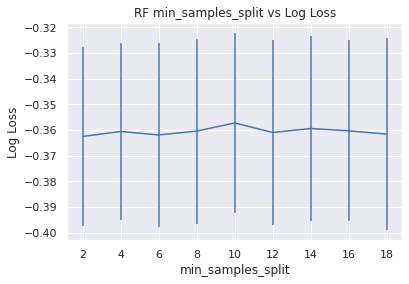

In [242]:
# plot
pyplot.errorbar(min_samples_split, means, yerr=stds)
pyplot.title("RF min_samples_split vs Log Loss")
pyplot.xlabel('min_samples_split')
pyplot.ylabel('Log Loss')

min_samples_split =10

In [243]:
model = RandomForestClassifier(n_estimators=400, min_samples_leaf=6, max_depth=6, max_features='sqrt')

In [244]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

0.9066390041493776


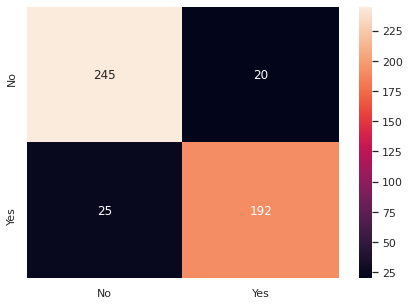

In [245]:
y_predict = model.predict(X_train)
print(model.score(X_train, y_train))
cm=metrics.confusion_matrix(y_train, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [254]:
y_pred=model.predict(X_train)
model_score=model.score(X_train,y_train)
print(model_score)
print(metrics.confusion_matrix(y_train,y_pred))
print(metrics.classification_report(y_train, y_pred))

0.9066390041493776
[[245  20]
 [ 25 192]]
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       265
           1       0.91      0.88      0.90       217

    accuracy                           0.91       482
   macro avg       0.91      0.90      0.91       482
weighted avg       0.91      0.91      0.91       482



0.8502415458937198


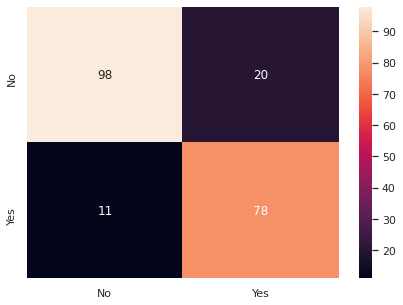

In [247]:
y_predict = model.predict(X_test)
print(model.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [255]:
y_pred=model.predict(X_test)
model_score=model.score(X_test,y_test)
print(model_score)
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.classification_report(y_test, y_pred))

0.8502415458937198
[[98 20]
 [11 78]]
              precision    recall  f1-score   support

           0       0.90      0.83      0.86       118
           1       0.80      0.88      0.83        89

    accuracy                           0.85       207
   macro avg       0.85      0.85      0.85       207
weighted avg       0.85      0.85      0.85       207



AUC: 0.967


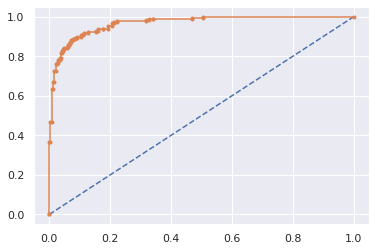

In [249]:
# AUC and ROC for the training data

# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.940


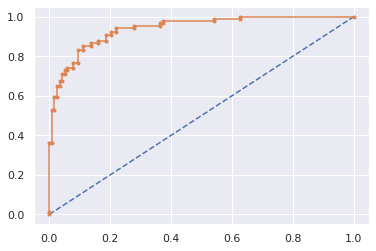

In [250]:
# AUC and ROC for the test data

# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [251]:
feature = model.feature_importances_
feature

array([0.03676709, 0.05025269, 0.0330278 , 0.01150107, 0.11183782,
       0.12768783, 0.09901415, 0.00626393, 0.00847742, 0.00952031,
       0.41418499, 0.08973911, 0.00172579])

No handles with labels found to put in legend.


AUC: 0.939


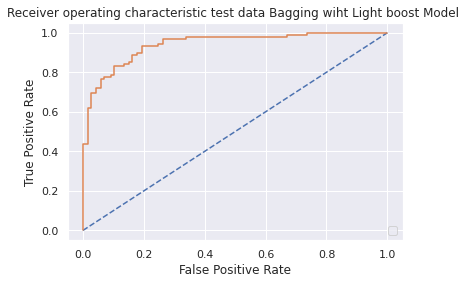

In [252]:
# predict probabilities
probs = bgcl_light.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr,test_tpr,test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic test data Bagging wiht Light boost Model ')
plt.legend(loc="lower right")
plt.show()

In [257]:
model.feature_importances_

array([0.03676709, 0.05025269, 0.0330278 , 0.01150107, 0.11183782,
       0.12768783, 0.09901415, 0.00626393, 0.00847742, 0.00952031,
       0.41418499, 0.08973911, 0.00172579])

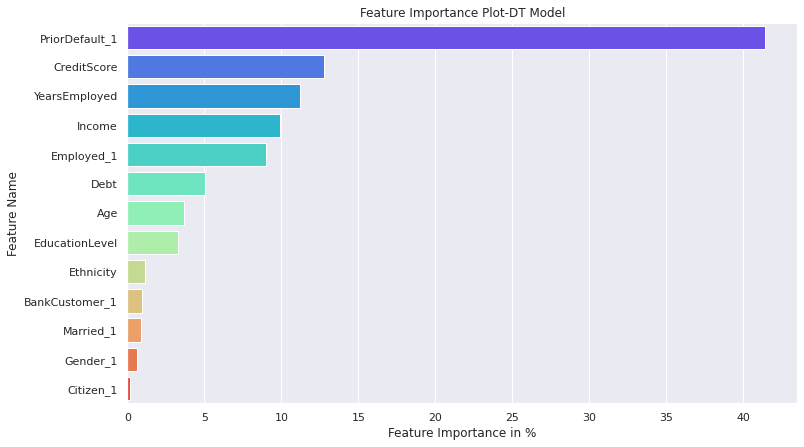

In [258]:
x=pd.DataFrame(model.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot-DT Model')
plt.show()